## Proje Tanımı
**Bu proje, bir mobil oyunda kullanıcıların oyun içi davranışlarını analiz ederek kullanıcıların oyun ile etkileşim seviyelerini, kalıcılığını, harcama davranışlarını ve teknik sorunların etkisini anlamayı hedefler.
Amaç, veri odaklı içgörüler ile ürün geliştirme, kullanıcı tutma ve gelir artırma stratejilerine destek olmaktır.**

---

## Projenin Amacı
**Bu analiz ile cevaplanması hedeflenen sorular:**
- Oyuncular oyunu nasıl oynuyor?
- Kullanıcılar hangi davranışsal segmentlere ayrılabilir?
- Hangi kullanıcı tipleri daha yüksek retention gösteriyor?
- Hangi kullanıcı profili daha fazla gelir üretiyor?
- Davranışlar iOS vs. Android arasında nasıl farklılaşıyor?
- Ülkeler bazında kullanıcı değeri nasıl değişiyor?
- Bağlantı hataları kullanıcı deneyimini nasıl etkiliyor?

**Bu sorular oyun için uzun vadeli ürün ve büyüme kararlarının temelini oluşturur.**

---

## Veri Seti
**Analizde kullanılan veri seti günlük kullanıcı aktivitesini içermektedir. İçerisindeki temel metrikler:**

- total_session_count  
- total_session_duration  
- match_start_count / match_end_count  
- victory / defeat  
- server_connection_error  
- iap_revenue / ad_revenue  

**Bu alanlar kullanılarak kullanıcı davranışını yansıtan türev ölçümler elde edilmiştir.  
Veri süresi: toplam 29 günlük zaman aralığı**

---

## Metodoloji
**Çalışmada izlenen analitik yaklaşım:**

- Veri kontrolü ve temizleme  
- Tarih format dönüşümü ve normalizasyon  
- Günlük verinin kullanıcı bazına agregasyonu  
- Yeni türetilmiş davranış metriklerinin oluşturulması  

**Örneğin:**
- sessions_per_day  
- win_rate  
- completion_rate  
- play_intensity  
- error_rate  

**Uygulanan analiz adımları:**
- Kullanıcı segmentasyonu (K-means Clustering)  
- Monetization analizi (IAP + Ads)  
- Platform ve ülke karşılaştırması  
- Teknik kalite / hata etkisinin ölçümü  
- Final öneriler ve stratejik çıkarımlar  

---

## Beklenen Çıktılar
**Bu çalışma sonunda:**
- Kullanıcı davranış kalıpları belirlenir  
- Segment bazlı kullanıcı profilleri çıkarılır  
- Platform ve ülke bazında kullanıcı değeri ölçülür  
- Teknik hataların retention üzerindeki etkisi görülür  
- Hangi segmentlerin veya pazarların hedeflenmesi gerektiği tespit edilir  

**Sonuçlar ürün ekibinin:**
- kullanıcı tutma  
- gelir artırma  
- teknik stabilite  
- pazar optimizasyonu  
- hedefli kullanıcı edinimi  

konularında karar almasını destekler.


## Project Description
**This project aims to analyze user behaviors within a mobile game in order to understand engagement levels, user longevity, spending behavior, and the effects of technical issues on user experience.
The goal is to provide data-driven insights to support product development, user retention optimization, and revenue growth strategies.**

---

## Purpose of the Analysis
**Key questions addressed in this study:**
- How do players engage with the game?
- How can users be segmented based on behavioral patterns?
- Which user types demonstrate higher retention?
- Which user profiles generate the most revenue?
- How do player behaviors differ between iOS and Android?
- How does user value vary by country?
- How do connection errors impact the user experience?

**These questions guide long-term product and growth decisions for the game.**

---

## Dataset
**The dataset includes daily user activity with the following core metrics:**

- total_session_count  
- total_session_duration  
- match_start_count / match_end_count  
- victory / defeat  
- server_connection_error  
- iap_revenue / ad_revenue  

**Using these raw metrics, derived behavioral measurements were calculated.  
Data period: total of 29 days**

---

## Methodology
**Analytical approach used in the study:**

- Data inspection and cleaning  
- Timestamp normalization  
- Aggregation from daily activity to user-level history  
- Creation of derived behavioral metrics  

**For example:**
- sessions_per_day  
- win_rate  
- completion_rate  
- play_intensity  
- error_rate  

**Additional analysis steps:**
- User segmentation (K-means Clustering)  
- Monetization analysis (IAP + Ads)  
- Platform and country comparisons  
- Measuring the impact of technical quality / errors  
- Final strategic recommendations  

---

## Expected Outputs
**At the end of this analysis:**
- User behavioral patterns will be identified  
- Segment-based user profiles will be created  
- User value will be measured by platform and country  
- The effect of technical errors on retention will be visible  
- Key segments and target markets will be identified  

**The results will assist the product team with decisions related to:**
- user retention  
- revenue growth  
- technical stability  
- market optimization  
- targeted user acquisition  


In [4]:
import os
import pandas as pd
import numpy as np
from pathlib import Path

data_path = Path("data/raw")

files = list(data_path.glob("*.csv"))

df_list = [pd.read_csv(f) for f in files]

df = pd.concat(df_list, ignore_index=True)


In [5]:
from IPython.display import display

print("SHAPE:")
display(df.shape)

print("COLUMNS:")
display(df.columns)

print("INFO:")
df.info()

print("HEAD:")
display(df.head())

print('TAIL')
display(df.tail())



SHAPE:


(7293526, 14)

COLUMNS:


Index(['user_id', 'event_date', 'platform', 'install_date', 'country',
       'total_session_count', 'total_session_duration', 'match_start_count',
       'match_end_count', 'victory_count', 'defeat_count',
       'server_connection_error', 'iap_revenue', 'ad_revenue'],
      dtype='object')

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7293526 entries, 0 to 7293525
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   user_id                  object 
 1   event_date               object 
 2   platform                 object 
 3   install_date             object 
 4   country                  object 
 5   total_session_count      int64  
 6   total_session_duration   float64
 7   match_start_count        int64  
 8   match_end_count          int64  
 9   victory_count            int64  
 10  defeat_count             int64  
 11  server_connection_error  int64  
 12  iap_revenue              float64
 13  ad_revenue               float64
dtypes: float64(3), int64(6), object(5)
memory usage: 779.0+ MB
HEAD:


,user_id,event_date,platform,install_date,country,total_session_count,total_session_duration,match_start_count,match_end_count,victory_count,defeat_count,server_connection_error,iap_revenue,ad_revenue
0,62AB5D041EA59153,2024-03-02,android,2023-12-10,NaN,0,1.065,0,0,0,0,0,0.0,0.000000
1,6A105F7A03D8B261,2024-02-22,ios,2024-02-10,NaN,1,159.315,1,0,0,0,0,0.0,0.000000
2,D2CB8F300BCF6316,2024-02-18,ios,2023-05-14,NaN,1,580.681,0,0,0,0,0,0.0,0.011133
3,9A61BF02B5FBAEB3,2024-02-15,android,2023-07-08,NaN,1,28.140,0,0,0,0,0,0.0,0.000000
4,619034EA7DC49794,2024-02-15,ios,2023-11-02,NaN,0,0.712,0,0,0,0,0,0.0,0.000000


TAIL


,user_id,event_date,platform,install_date,country,total_session_count,total_session_duration,match_start_count,match_end_count,victory_count,defeat_count,server_connection_error,iap_revenue,ad_revenue
7293521,D4C5C6BDADFFF928,2024-02-20,ios,2024-02-15,Northern Mariana Islands,5,2721.704,5,4,1,3,1,0.000000,0.008706
7293522,F6F244BF35589F34,2024-02-21,ios,2021-05-04,Northern Mariana Islands,6,9538.664,25,23,14,9,0,1.022431,0.065266
7293523,F3809025F2F33917,2024-02-29,ios,2023-12-29,St. Vincent & Grenadines,1,59.391,1,0,0,0,0,0.000000,0.000000
7293524,EBB66998DA020659,2024-03-15,android,2024-03-14,St. Vincent & Grenadines,3,1760.756,0,0,0,0,0,0.000000,0.000000
7293525,77A6A7A54E937927,2024-02-26,android,2024-02-26,St. Vincent & Grenadines,1,97.359,1,1,0,1,0,0.000000,0.000000


## 1. Data Preparation & Metric Definitions
**Bu bölümde veri seti üzerinde ön hazırlık yapılmış, veri tipi dönüşümleri gerçekleştirilmiş ve kullanıcı bazlı analiz için gerekli türev metrikler oluşturulmuştur.**

---

### 1.1 Veri Tipi Kontrolü ve Tarih Dönüşümü
**Veri setindeki tarih alanları (event_date, install_date) standart datetime formatına dönüştürülmüş ve analiz için normalize edilmiştir.**

Bu aşamanın amacı:
- Tarihsel sıralama yapabilmek  
- Gün bazında kullanıcı aktivitesini takip edebilmek  
- Cohort ve zaman bazlı ölçümler uygulayabilmek  

---

### 1.2 User-Level Agregasyon
**Orijinal veri günlük bazlı aktivite içerdiğinden kullanıcı başına tüm kayıtlar birleştirilmiş ve her kullanıcı için toplam oynama süresi, toplam session sayısı, toplam maç sayıları gibi özet değerler hesaplanmıştır.**

Bu sayede:
- Her kullanıcı tek satıra indirgenmiş  
- Tekil oyuncu davranışı analiz edilebilir hale getirilmiştir  
- Segmentasyon ve cluster analizleri mümkün olmuştur  

---

### 1.3 Türetilmiş Metriklerin Oluşturulması
**Kullanıcı davranışını daha doğru yansıtan yeni ölçümler hesaplanmıştır. Örneğin:**

- sessions_per_day – günlük ortalama oyun giriş sayısı  
- avg_session_duration – oturum süresi  
- win_rate – kazanma oranı  
- completion_rate – maç tamamlama oranı  
- play_intensity – toplam oynama süresi / gün  
- error_rate – teknik hata sıklığı  
- total_revenue – IAP + Ads toplam geliri  

**Bu metrikler kullanıcı profilini tek boyuttan çok boyutlu davranış modeline genişletir.**

---

### 1.4 Veri Kalitesi ve Tutarlılık Kontrolleri
Bu aşamada:
- Eksik veri (missing values) kontrol edilmiştir  
- Mantıksız değerler (negatif süre, 0/0 oranları vb.) düzeltilmiştir  
- Türetilmiş metriklerde oluşan nan değerler 0’a normalize edilmiştir  

**Verinin güvenilirliği bu aşamada garanti altına alınır.**

---

### 1.5 Bu Aşamanın Sonucu
Bu bölüm tamamlandığında:
- Kullanıcı bazlı temiz bir dataset elde edilmiştir  
- Analiz için gerekli davranış metrikleri üretilmiştir  
- Segmentasyon, monetization ve platform/country karşılaştırmaları için veri hazır hale getirilmiştir  


## 1. Data Preparation & Metric Definitions
**In this stage, necessary preprocessing was performed, data types were normalized, and derived user-level behavioral metrics were created for deeper analysis.**

---

### 1.1 Date Conversion & Type Normalization
**Date fields (event_date, install_date) were converted to standard datetime format and normalized to enable time-based analysis.**

This enables:
- Proper chronological ordering  
- Tracking user activity on a daily basis  
- Cohort-based and day-of-life measurements  

---

### 1.2 Aggregation to User-Level
**Since the original dataset contains daily actions, all entries for each user were aggregated into a single row containing total metrics per user.**

This allowed:
- Each user to be represented by a single consolidated record  
- Individual user behavior to be analyzed  
- Clustering and segmentation to be applied  

---

### 1.3 Derived Metric Creation
**To better reflect user behavior, new metrics were computed, including:**

- sessions_per_day – average daily login frequency  
- avg_session_duration – average session duration  
- win_rate – victory ratio  
- completion_rate – match completion ratio  
- play_intensity – total playtime per day  
- error_rate – frequency of technical errors  
- total_revenue – sum of IAP + Ads revenue  

**These metrics transform player analysis from a single-dimensional view to a multidimensional behavioral model.**

---

### 1.4 Data Consistency & Quality Checks
During this stage:
- Missing values were inspected  
- Illogical values (negative time, zero-division results) were corrected  
- Derived metrics with NaN were normalized to 0  

**This ensures data reliability and analytical accuracy.**

---

### 1.5 Final Outcome of This Step
Upon completing this stage:
- A clean, player-level dataset is constructed  
- All required behavioral metrics are ready  
- The data is prepared for segmentation, monetization, and platform/country comparisons  


In [8]:
df["event_date"] = pd.to_datetime(df["event_date"], errors="coerce")
df["install_date"] = pd.to_datetime(df["install_date"], errors="coerce")
df[["event_date", "install_date"]].dtypes


event_date      datetime64[ns]
install_date    datetime64[ns]
dtype: object

### Türkçe Açıklama

Bu kodda `event_date` ve `install_date` sütunlarını `datetime` tipine çeviriyoruz çünkü ham veride bu alanlar metin/string olarak gelmiş olabilir.  

- `pd.to_datetime(..., errors="coerce")` kullanarak tarih formatına uymayan hatalı değerleri otomatik olarak `NaT` (eksik tarih) y### English Explanation

In this code, we convert the `event_date` and `install_date` columns to `datetime` type because in the raw data these fields may be stored as text/strings.  

- By using `pd.to_datetime(..., errors="coerce")`, any values that do not match a valid date format are safely converted to `NaT` (missing date).
- In the last line, `df[["event_date", "install_date"]].dtypes` lets us verify that both columns were successfully converted to `datetime64[ns]`.

This ensures we can reliably perform date-based filtering, sorting, and calculations later on (e.g., daily active users, cohort analysis, etc.).
apıyoruz.
- Son satırda `df[["event_date", "install_date"]].dtypes` ile bu iki sütunun gerçekten `datetime64[ns]` tipine dönüşüp dönüşmediğini kontrol ediyoruz.

Bu sayede daha sonra tarih bazlı filtreleme, sıralama ve hesaplamaları (örneğin günlük aktif kullanıcı, kohort analizi vb.) sorunsuz yapabiliyoruz.


### English Explanation

In this code, we convert the `event_date` and `install_date` columns to `datetime` type because in the raw data these fields may be stored as text/strings.  

- By using `pd.to_datetime(..., errors="coerce")`, any values that do not match a valid date format are safely converted to `NaT` (missing date).
- In the last line, `df[["event_date", "install_date"]].dtypes` lets us verify that both columns were successfully converted to `datetime64[ns]`.

This ensures we can reliably perform date-based filtering, sorting, and calculations later on (e.g., daily active users, cohort analysis, etc.).


In [11]:
print("EVENT DATE RANGE:")
print(df["event_date"].min(), "→", df["event_date"].max())

print("\nEVENT MONTH COUNTS:")
display(
    df["event_date"]
      .dt.to_period("M")
      .value_counts()
      .sort_index()
)


EVENT DATE RANGE:
2024-02-15 00:00:00 → 2024-03-15 00:00:00

EVENT MONTH COUNTS:


event_date
2024-02    3693494
2024-03    3600032
Freq: M, Name: count, dtype: int64

In [12]:
print("MISSING RATES (%):")
missing = df.isna().mean().sort_values(ascending=False) * 100
display(missing)



MISSING RATES (%):


country                    0.246767
user_id                    0.000000
event_date                 0.000000
platform                   0.000000
install_date               0.000000
total_session_count        0.000000
total_session_duration     0.000000
match_start_count          0.000000
match_end_count            0.000000
victory_count              0.000000
defeat_count               0.000000
server_connection_error    0.000000
iap_revenue                0.000000
ad_revenue                 0.000000
dtype: float64

In [13]:
df["country"] = df["country"].fillna("Unknown")


### Türkçe Açıklama

Bu kod parçasında önce veri setindeki eksik değer oranlarına bakıyoruz, sonra özellikle `country` sütunundaki eksikleri dolduruyoruz.

- `df.isna().mean().sort_values(ascending=False) * 100` her sütun için eksik değer oranını (yüzde olarak) hesaplar ve en çok eksik olandan en aza doğru sıralar.
- `print("MISSING RATES (%):")` ve `display(missing)` ile bu oranları ekranda görüp hangi değişkenlerde sorun olduğunu tespit ediyoruz.
- `df["country"] = df["country"].fillna("Unknown")` satırı ile `country` sütununda eksik olan değerleri `"Unknown"` etiketiyle değiştiriyoruz. Böylece:
  - Eksik ülke bilgileri analiz ve gruplama işlemlerinde sorun çıkarmaz,
  - Filtreleme ve segmentleme yaparken kayıp ülkeleri tek bir kategori olarak takip edebiliriz.


### English Explanation

In this code snippet, we first inspect the missing value rates in the dataset, then specifically handle missing values in the `country` column.

- `df.isna().mean().sort_values(ascending=False) * 100` calculates the percentage of missing values for each column and sorts them from highest to lowest.
- `print("MISSING RATES (%):")` and `display(missing)` let us see which variables have the most missing data and identify potential data quality issues.
- `df["country"] = df["country"].fillna("Unknown")` replaces missing values in the `country` column with the label `"Unknown"`. This:
  - Prevents missing country information from breaking groupby/aggregation logic,
  - Allows us to track and analyze users with no country info as a separate, explicit category.


In [16]:
num_cols = [
    "total_session_count",
    "total_session_duration",
    "match_start_count",
    "match_end_count",
    "victory_count",
    "defeat_count",
    "server_connection_error",
    "iap_revenue",
    "ad_revenue",
]

print("NUMERIC SUMMARY:")
display(df[num_cols].describe().T)


NUMERIC SUMMARY:


,count,mean,std,min,25%,50%,75%,max
total_session_count,7293526.0,1.735753,1.293940,0.0,1.000,1.0000,2.000000,3.600000e+01
total_session_duration,7293526.0,1844.908628,3205.433934,0.0,217.148,707.4485,2045.486500,1.233541e+06
match_start_count,7293526.0,4.728021,8.220787,0.0,1.000,2.0000,5.000000,6.830000e+02
match_end_count,7293526.0,3.911876,7.004659,0.0,0.000,2.0000,5.000000,2.740000e+02
victory_count,7293526.0,2.432663,4.969295,0.0,0.000,1.0000,3.000000,2.710000e+02
defeat_count,7293526.0,1.479213,3.107429,0.0,0.000,0.0000,1.000000,1.270000e+02
server_connection_error,7293526.0,0.033630,0.416346,0.0,0.000,0.0000,0.000000,2.150000e+02
iap_revenue,7293526.0,0.128001,4.272489,0.0,0.000,0.0000,0.000000,2.790235e+03
ad_revenue,7293526.0,0.020069,0.094550,0.0,0.000,0.0000,0.011441,3.236633e+01


In [17]:
print("ANY DUPLICATED (user_id, event_date)?")
print(df[["user_id", "event_date"]].duplicated().any())


ANY DUPLICATED (user_id, event_date)?
True


In [18]:
dups = df[df[["user_id", "event_date"]].duplicated(keep=False)]
dups.head(20)


,user_id,event_date,platform,install_date,country,total_session_count,total_session_duration,match_start_count,match_end_count,victory_count,defeat_count,server_connection_error,iap_revenue,ad_revenue
4048,95985BAB08A57E60,2024-02-26,ios,2024-01-09,Peru,1,65.531,0,0,0,0,0,0.0,0.000000
8925,CA7E9020BB98DCAA,2024-02-16,ios,2023-01-29,Chile,1,0.000,0,0,0,0,0,0.0,0.000000
17069,142ED8F719586877,2024-03-01,android,2024-02-09,India,3,1154.919,0,0,0,0,0,0.0,0.000000
29541,E1395153991B8475,2024-03-13,ios,2022-04-30,India,7,4957.319,6,4,3,1,0,0.0,0.070324
32823,564A208D8AD3973B,2024-02-20,android,2024-02-19,India,2,5105.303,8,8,4,4,0,0.0,0.160635
33573,1995D97C29AC5980,2024-02-27,ios,2022-04-16,India,6,12333.932,30,10,8,2,0,0.0,0.000000
33919,72BCC7B31073412C,2024-03-09,android,2022-02-20,India,7,8129.420,12,11,5,6,0,0.0,0.007946
34615,83D202E31BAB1C01,2024-02-27,android,2024-01-11,India,3,8712.026,16,14,6,8,0,0.0,0.002386
35574,564A208D8AD3973B,2024-02-21,android,2024-02-19,India,2,14064.425,25,24,13,11,0,0.0,0.084558
36062,1F006EDD0428C984,2024-03-11,android,2023-02-08,Italy,1,33.755,0,0,0,0,0,0.0,0.000000


In [19]:
dups = df[df[["user_id", "event_date"]].duplicated(keep=False)]
print('tekrarlanan satir \n',len(dups))
dups["user_id"].nunique()
len(dups) / len(df)


tekrarlanan satir 
 1310


0.00017961134299103066

In [20]:
daily = df.groupby(["user_id", "event_date"], as_index=False).agg(
    total_session_count=("total_session_count", "sum"),
    total_session_duration=("total_session_duration", "sum"),
    match_start_count=("match_start_count", "sum"),
    match_end_count=("match_end_count", "sum"),
    victory_count=("victory_count", "sum"),
    defeat_count=("defeat_count", "sum"),
    server_connection_error=("server_connection_error", "sum"),
    iap_revenue=("iap_revenue", "sum"),
    ad_revenue=("ad_revenue", "sum"),
    platform_count=("platform", "nunique"),  # multi-device info
    platform=("platform", "first"),
    install_date=("install_date", "first"),
    country=("country", "first")
)
daily[["user_id", "event_date"]].duplicated().any()


np.False_

In [21]:
df = daily
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292871 entries, 0 to 7292870
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   user_id                  object        
 1   event_date               datetime64[ns]
 2   total_session_count      int64         
 3   total_session_duration   float64       
 4   match_start_count        int64         
 5   match_end_count          int64         
 6   victory_count            int64         
 7   defeat_count             int64         
 8   server_connection_error  int64         
 9   iap_revenue              float64       
 10  ad_revenue               float64       
 11  platform_count           int64         
 12  platform                 object        
 13  install_date             datetime64[ns]
 14  country                  object        
dtypes: datetime64[ns](2), float64(3), int64(7), object(3)
memory usage: 834.6+ MB


### Türkçe Açıklama

Bu bölümde önce veri setinde **aynı kullanıcı ve aynı gün için birden fazla satır** olup olmadığını kontrol ediyor, sonra bu tekrarları mantıklı bir şekilde tek satıra indiriyoruz.

1. **Tekrarlı kayıt kontrolü**

```python
print("ANY DUPLICATED (user_id, event_date)?")
print(df[["user_id", "event_date"]].duplicated().any())


### English Explanation

In this section, we first check whether we have **multiple rows for the same user on the same day**, and then we aggregate those duplicates into a single, consistent daily record.

1. **Checking for duplicate records**

```python
print("ANY DUPLICATED (user_id, event_date)?")
print(df[["user_id", "event_date"]].duplicated().any())


In [24]:
user_quick = df.groupby("user_id").agg(
    days_played=("event_date", "nunique"),
    total_sessions=("total_session_count", "sum"),
    total_duration=("total_session_duration", "sum"),
    total_matches=("match_start_count", "sum"),
    total_iap=("iap_revenue", "sum"),
    total_ads=("ad_revenue", "sum"),
)

print("USER-LEVEL QUICK SUMMARY:")
display(user_quick.describe().T)


USER-LEVEL QUICK SUMMARY:


,count,mean,std,min,25%,50%,75%,max
days_played,2453499.0,2.972437,4.516090,1.0,1.000,1.000,3.000000,3.000000e+01
total_sessions,2453499.0,5.159880,13.179125,0.0,1.000,2.000,4.000000,4.020000e+02
total_duration,2453499.0,5484.367039,24877.351553,0.0,243.043,731.345,2383.760500,1.692050e+06
total_matches,2453499.0,14.055007,63.228339,0.0,1.000,3.000,7.000000,1.114200e+04
total_iap,2453499.0,0.380510,14.100185,0.0,0.000,0.000,0.000000,6.447200e+03
total_ads,2453499.0,0.059658,0.370193,0.0,0.000,0.000,0.017211,9.100296e+01


### Türkçe Açıklama – User-Level Quick Summary

Bu tablo, her kullanıcı için oluşturduğumuz **özet metriklerin dağılımını** gösteriyor. Satırlar metrikleri, sütunlar ise bu metriklerin temel istatistiklerini (count, mean, std, min, yüzdelikler, max) temsil ediyor.

- **days_played**  
  - Ortalama ~3 gün, medyan (50%) = 1 gün → Kullanıcıların büyük kısmı sadece **1 gün oynayıp** bırakıyor, az sayıda kullanıcı ise çok daha uzun süre oynadığı için ortalama yukarı çekiliyor.
  - Maksimum 30 gün → Gözlem periyodu boyunca en fazla 30 gün oyuna girilmiş.

- **total_sessions**  
  - Ortalama ~5.16 oturum, medyan 2 oturum → Çoğu oyuncu az sayıda oturum açarken, nadir de olsa yüzlerce oturum açan kullanıcılar var (max ≈ 402).

- **total_duration**  
  - Ortalama 5.5K saniye (1.5 saat), medyan 731 saniye (12 dakika) → Çoğu kullanıcının oyun süresi kısa, ama bazı heavy-user’ların çok uzun süre oynadığı bir **long-tail** yapı var (max ~1.69M saniye).

- **total_matches**  
  - Ortalama 14 maç, medyan 3 maç → Çoğu kullanıcı az maç oynarken, binlerce maç yapan oyuncular da var (max ≈ 11,142).

- **total_iap (in-app purchases)**  
  - Ortalama 0.38 ama medyan 0 → Kullanıcıların çoğu hiç ödeme yapmıyor, yani **payer oranı düşük**, harcama yapan az sayıda kullanıcı büyük miktarda ödeme yapıyor (max ≈ 6,447).

- **total_ads (ad revenue)**  
  - Ortalama 0.06, medyan 0 → Reklam geliri de çok konsantre; çoğu kullanıcıdan reklam geliri yok veya çok az, az sayıdaki kullanıcı yüksek reklam gösterimiyle geliri oluşturuyor.

Genel olarak tablo, kullanıcı bazında metriklerin **çok sağa çarpık (skewed)** olduğunu, yani az sayıda heavy-user’ın metrikleri domine ettiğini ve çoğu oyuncunun kısa süreli/az etkileşimli olduğunu gösteriyor.


### English Explanation – User-Level Quick Summary

This table shows the distribution of **user-level aggregated metrics**. Each row is a metric, and the columns (count, mean, std, min, percentiles, max) describe how that metric is distributed across all users.

- **days_played**  
  - Mean ~3 days, median (50%) = 1 day → Most users play only **1 day**, while a smaller group plays much longer and pulls the average up.
  - Maximum 30 days → Within the observation window, the longest streak is 30 days with at least one login.

- **total_sessions**  
  - Mean ~5.16 sessions, median 2 → The typical user has only a few sessions, but there are outliers with hundreds of sessions (max ≈ 402).

- **total_duration**  
  - Mean ~5.5K seconds (~1.5 hours), median ~731 seconds (~12 minutes) → Most players have short total playtime, but a few heavy users play for extremely long durations (max ~1.69M seconds), creating a strong long tail.

- **total_matches**  
  - Mean 14 matches, median 3 → Again, most users play only a handful of matches, while a small subset plays thousands (max ≈ 11,142).

- **total_iap (in-app purchases)**  
  - Mean 0.38, median 0 → The majority of users never pay; **payer share is low**, and revenue is highly concentrated in a small group of spenders (max ≈ 6,447).

- **total_ads (ad revenue)**  
  - Mean 0.06, median 0 → Ad revenue is similarly concentrated; most users generate little to no ad revenue, and a small subset with many ad impressions drives most of it.

Overall, this summary shows that user metrics are **heavily right-skewed**: a small minority of heavy users dominate engagement and monetization, while the majority are low-activity or short-lived players.


In [27]:

user = df.groupby("user_id").agg(
    days_played=("event_date", "nunique"),
    total_sessions=("total_session_count", "sum"),
    total_duration=("total_session_duration", "sum"),
    total_matches_started=("match_start_count", "sum"),
    total_matches_ended=("match_end_count", "sum"),
    total_wins=("victory_count", "sum"),
    total_losses=("defeat_count", "sum"),
    total_errors=("server_connection_error", "sum"),
    total_iap=("iap_revenue", "sum"),
    total_ads=("ad_revenue", "sum")
).reset_index()


In [28]:
# Session-based metrics
user["sessions_per_day"] = user["total_sessions"] / user["days_played"].replace(0, np.nan)
user["avg_session_duration"] = user["total_duration"] / user["total_sessions"].replace(0, np.nan)

# Match metrics
user["match_intensity"] = user["total_matches_started"] / user["days_played"].replace(0, np.nan)

# Win/Loss metrics
user["win_rate"] = user["total_wins"] / (user["total_wins"] + user["total_losses"]).replace(0, np.nan)

# Completion
user["completion_rate"] = user["total_matches_ended"] / user["total_matches_started"].replace(0, np.nan)

# Behavioral metrics
user["aggression_score"] = user["total_matches_started"] / user["total_duration"].replace(0, np.nan)
user["play_intensity"] = user["total_duration"] / user["days_played"].replace(0, np.nan)

# Error metrics
user["error_rate"] = user["total_errors"] / user["total_matches_started"].replace(0, np.nan)

# Monetization metrics
user["revenue_per_session"] = (user["total_iap"] + user["total_ads"]) / user["total_sessions"].replace(0, np.nan)

# Fill NaN for safe usage
cols = ["sessions_per_day", "avg_session_duration", "match_intensity", "win_rate",
        "completion_rate", "aggression_score", "play_intensity", "error_rate", "revenue_per_session"]

user[cols] = user[cols].fillna(0)


### Türkçe Açıklama – User-Level Derived Metrics

Bu kod bloğunda, user-level özet metriklerden **türetilmiş davranış, performans ve monetizasyon metrikleri** oluşturuyoruz. Amaç, her oyuncunun oyun alışkanlığını daha iyi anlayabilmek.

- **Session-based metrics**
  - `sessions_per_day`  
    Kullanıcının ortalama günde kaç oturum açtığını ölçer:  
    `total_sessions / days_played`  
    → Aktiflik / oyun sıklığı hakkında fikir verir.
  - `avg_session_duration`  
    Ortalama oturum süresini hesaplar:  
    `total_duration / total_sessions`  
    → Oyuncunun tek oturumda ne kadar zaman geçirdiğini gösterir.

- **Match metrics**
  - `match_intensity`  
    Kullanıcının bir günde ortalama kaç maç başlattığını ölçer:  
    `total_matches_started / days_played`  
    → Oynama yoğunluğunu (engagement) yansıtır.

- **Win/Loss metrics**
  - `win_rate`  
    Kullanıcının kazandığı maçların toplam maçlara oranı:  
    `total_wins / (total_wins + total_losses)`  
    → Oyuncunun performans ve beceri seviyesini kabaca gösterir.

- **Completion**
  - `completion_rate`  
    Başlatılan maçların ne kadarının tamamlandığını ölçer:  
    `total_matches_ended / total_matches_started`  
    → Rage quit / yarım bırakma davranışını tespit etmek için kullanılabilir.

- **Behavioral metrics**
  - `aggression_score`  
    Birim süre başına başlatılan maç sayısı:  
    `total_matches_started / total_duration`  
    → Daha sık maç başlatan, daha agresif oynayan oyuncuları ayırt etmeye yardımcı olur.
  - `play_intensity`  
    Gün başına toplam oyun süresi:  
    `total_duration / days_played`  
    → Oyuncunun günlük ne kadar yoğun oynadığını gösterir.

- **Error metrics**
  - `error_rate`  
    Maç başına ortalama hata sayısını ölçer:  
    `total_errors / total_matches_started`  
    → Teknik sorun yaşayan veya hata üreten oyuncu deneyimini analiz etmek için kullanılır.

- **Monetization metrics**
  - `revenue_per_session`  
    Oturum başına ortalama gelir (IAP + Ads):  
    `(total_iap + total_ads) / total_sessions`  
    → Kullanıcının oturum bazında ne kadar monetizasyon ürettiğini gösterir.

- **Neden `.replace(0, np.nan)` ve `fillna(0)` kullanıyoruz?**  
  - Bölme işlemlerinde payda 0 olursa hata veya anlamsız sonuç oluşmaması için önce `0` değerlerini `NaN`’e çeviriyoruz.  
  - Tüm bu türetilmiş metrikleri oluşturduktan sonra, analiz ve modellemelerde rahat kullanabilmek için `NaN` değerleri güvenli bir şekilde `0` ile dolduruyoruz.


### English Explanation – User-Level Derived Metrics

In this code block, we compute **derived behavioral, performance, and monetization metrics** from user-level aggregates. The goal is to better understand each player’s gameplay pattern.

- **Session-based metrics**
  - `sessions_per_day`  
    Average number of sessions per active day:  
    `total_sessions / days_played`  
    → Captures how frequently a player opens the game.
  - `avg_session_duration`  
    Average session length:  
    `total_duration / total_sessions`  
    → Shows how long a typical play session lasts.

- **Match metrics**
  - `match_intensity`  
    Average number of matches started per day:  
    `total_matches_started / days_played`  
    → A proxy for engagement intensity.

- **Win/Loss metrics**
  - `win_rate`  
    Share of won matches among all decided matches:  
    `total_wins / (total_wins + total_losses)`  
    → Rough indicator of player skill/performance.

- **Completion**
  - `completion_rate`  
    Fraction of started matches that actually finish:  
    `total_matches_ended / total_matches_started`  
    → Useful to detect behaviors like rage quits or early exits.

- **Behavioral metrics**
  - `aggression_score`  
    Matches started per unit of time:  
    `total_matches_started / total_duration`  
    → Highlights players who start matches very frequently (more “aggressive” playstyle).
  - `play_intensity`  
    Total playtime per day:  
    `total_duration / days_played`  
    → Measures how intensely a player spends time in the game on days they are active.

- **Error metrics**
  - `error_rate`  
    Average number of errors per match started:  
    `total_errors / total_matches_started`  
    → Helps analyze technical issues or unstable gameplay experience.

- **Monetization metrics**
  - `revenue_per_session`  
    Average revenue per session (IAP + Ads):  
    `(total_iap + total_ads) / total_sessions`  
    → Indicates how much each session is worth in terms of monetization.

- **Why `.replace(0, np.nan)` and `fillna(0)`?**  
  - When the denominator is 0, division would produce invalid or misleading values. To avoid that, we first convert zeros in the denominator to `NaN`.  
  - After computing all derived metrics, we replace remaining `NaN` with 0 via `fillna(0)` so the features are safe and convenient to use in downstream analysis and modeling.


In [31]:
display(user.describe().T)
## processed data ##

,count,mean,std,min,25%,50%,75%,max
days_played,2453499.0,2.972437,4.516090,1.0,1.000000,1.000000,3.000000,3.000000e+01
total_sessions,2453499.0,5.159880,13.179125,0.0,1.000000,2.000000,4.000000,4.020000e+02
total_duration,2453499.0,5484.367039,24877.351553,0.0,243.043000,731.345000,2383.760500,1.692050e+06
total_matches_started,2453499.0,14.055007,63.228339,0.0,1.000000,3.000000,7.000000,1.114200e+04
total_matches_ended,2453499.0,11.628848,51.391611,0.0,0.000000,2.000000,6.000000,4.617000e+03
total_wins,2453499.0,7.231586,35.442157,0.0,0.000000,1.000000,5.000000,4.591000e+03
total_losses,2453499.0,4.397262,21.176588,0.0,0.000000,1.000000,1.000000,1.313000e+03
total_errors,2453499.0,0.099971,1.019572,0.0,0.000000,0.000000,0.000000,5.490000e+02
total_iap,2453499.0,0.380510,14.100185,0.0,0.000000,0.000000,0.000000,6.447200e+03
total_ads,2453499.0,0.059658,0.370193,0.0,0.000000,0.000000,0.017211,9.100296e+01


### Türkçe Açıklama – User-Level Metrik Özeti (Ham + Türetilmiş)

Bu tablo, hem ham (toplam) metrikleri hem de türetilmiş davranış/metalaştırma metriklerini kullanıcı bazında özetliyor. Sayılar, kullanıcı dağılımının **çok sağa çarpık** olduğunu ve küçük bir “heavy user / whale” kitlesinin metrikleri domine ettiğini gösteriyor.

**Temel kullanım metrikleri**
- **days_played**  
  Ortalama ~3 gün, medyan 1 gün → Çoğu oyuncu sadece 1 gün oynuyor, az sayıda kullanıcı daha uzun süre oynayıp ortalamayı yukarı çekiyor (max 30).
- **total_sessions**  
  Ortalama ~5.16, medyan 2 oturum → Tipik oyuncu çok sık dönmüyor; yüzlerce oturuma çıkan nadir kullanıcılar var (max 402).
- **total_duration**  
  Ortalama 5.5K sn (1.5 saat), medyan 731 sn (~12 dk) → Kısa süre deneyen çok, saatlerce oynayan az ama etkili bir kitle var (max ~1.69M sn).

**Maç ve performans metrikleri**
- **total_matches_started / total_matches_ended / total_wins / total_losses**  
  Medyanlar düşük (çoğu oyuncu az maç oynuyor), ama binlerce maç yapan ve yüksek kazanma sayısına ulaşan heavy oyuncular var.
- **match_intensity (~2.65 maç/gün)**  
  Ortalama olarak oyuncular aktif oldukları günde 2–3 maç başlatıyor.
- **win_rate (ortalama ~0.47, medyan 0.5)**  
  Kazanma oranı genel olarak dengeli; birçok oyuncu %50 civarında, bazıları çok düşük / çok yüksek kazanma oranına sahip.
- **completion_rate (ortalama ~0.65, medyan ~0.83)**  
  Çoğu oyuncu başlattığı maçların büyük kısmını bitiriyor, ancak erken çıkış / yarım bırakma davranışı da azımsanmayacak seviyede.

**Davranışsal metrikler**
- **sessions_per_day (ortalama ~1.33)**  
  Aktif olduğu gün başına ~1–1.5 oturum açan bir kullanıcı kitlesi var → “günde bir bakıp çıkan” oyuncu profili baskın.
- **avg_session_duration (ortalama ~596 sn ≈ 10 dk)**  
  Tek oturum uzunluğu makul; medyan ~400 sn (6–7 dk) civarında.
- **play_intensity (~884 sn/gün)**  
  Aktif gün başına ortalama ~15 dakikalık oyun süresi; heavy kullanıcılar bu süreyi ciddi şekilde yukarı çekiyor.
- **aggression_score**  
  Ortalama yüksek görünse de medyan çok düşük → Birkaç ekstrem outlier (çok kısa sürede aşırı maç başlatanlar) metriği bozuyor; bu metriği yorumlarken log-transform veya trimming düşünmek mantıklı.

**Hata ve kalite metrikleri**
- **total_errors (ortalama ~0.1, medyan 0)** → Çoğu kullanıcı hiç hata yaşamıyor, ama bazı kullanıcılar çok fazla hata almış.
- **error_rate (ortalama ~0.012, medyan 0)**  
  Maç başına hata oranı çok düşük; hata deneyimi daha çok küçük bir kullanıcı segmentinde yoğunlaşıyor.

**Monetizasyon metrikleri**
- **total_iap / total_ads**  
  Medyan 0 → Çoğu kullanıcıdan gelir gelmiyor, hem IAP hem ads tarafında gelir küçük bir kullanıcı grubunda yoğunlaşmış (whale & high engagement segment).
- **revenue_per_session (ortalama ~0.026, medyan 0)**  
  Oturum başına elde edilen gelir çok düşük ve çok çarpık dağılıyor; monetizasyonu birkaç yüksek değerli kullanıcının taşıdığını teyit ediyor.

Genel resim:  
Kullanıcı tabanı ağırlıklı olarak **low-engagement, low-monetization**, üzerine binen küçük bir **high-engagement, high-value** oyuncu segmenti var. Türetilmiş metrikler (sessions_per_day, win_rate, completion_rate, play_intensity vb.) bu segmentleri ayırmak ve hedeflemek için güçlü özellikler sunuyor.


### English Explanation – User-Level Metrics Summary (Raw + Derived)

This table summarizes both raw (total) and derived metrics at the user level. Overall, the distributions are **heavily right-skewed**: a small group of heavy / whale users drives most of the engagement and revenue, while the majority shows low activity.

**Core usage metrics**
- **days_played**  
  Mean ~3, median 1 → Most users only play on a single day, while a minority plays much longer (max 30 days).
- **total_sessions**  
  Mean ~5.16, median 2 sessions → A typical player has only a few sessions; hundreds of sessions are rare but present (max 402).
- **total_duration**  
  Mean ~5.5K seconds (~1.5h), median ~731 seconds (~12 min) → Many users try the game briefly; a few invest very long playtime (max ~1.69M seconds).

**Match and performance metrics**
- **total_matches_started / total_matches_ended / total_wins / total_losses**  
  Medians are low (most users play few matches), but some users play thousands of matches and accumulate very high win counts.
- **match_intensity (~2.65 matches/day)**  
  On days they are active, users start on average about 2–3 matches.
- **win_rate (mean ~0.47, median 0.5)**  
  Win rates are roughly centered around 50%, with some users having very low or very high ratios.
- **completion_rate (mean ~0.65, median ~0.83)**  
  Most players complete a large share of the matches they start, but early quits / drop-offs are not negligible.

**Behavioral metrics**
- **sessions_per_day (mean ~1.33)**  
  On average, players open about 1–1.5 sessions per active day → “log in once per day and leave” behavior is common.
- **avg_session_duration (mean ~596s ≈ 10 min)**  
  Single-session length is reasonable; median ~400s (6–7 min).
- **play_intensity (~884s/day)**  
  Total playtime per active day is ~15 minutes on average, again pushed up by a small group of heavy users.
- **aggression_score**  
  Mean is high but median is extremely low → a few extreme outliers (users starting many matches in short time) distort the average; this metric may benefit from log transformation or outlier capping.

**Error and quality metrics**
- **total_errors (mean ~0.1, median 0)** → Most users never encounter an error; a small subgroup experiences many.
- **error_rate (mean ~0.012, median 0)**  
  Errors per match are very low on average; issues are concentrated in a small subset of players.

**Monetization metrics**
- **total_iap / total_ads**  
  Median is 0 for both → The vast majority of users do not generate direct revenue; IAP and ad revenue are highly concentrated in a small fraction of users.
- **revenue_per_session (mean ~0.026, median 0)**  
  Revenue per session is very low and highly skewed, confirming that monetization is driven by a small group of high-value players.

Overall, this profile shows a user base dominated by **low-engagement, non-paying** players, with a small **high-engagement, high-value** segment. The derived metrics (sessions_per_day, win_rate, completion_rate, play_intensity, etc.) are valuable features to segment these players and drive targeted product or monetization strategies.


In [34]:
df["event_month"] = df["event_date"].dt.to_period("M").astype(str)
mau = df.groupby("event_month")["user_id"].nunique().rename("MAU")

monthly_rev = df.groupby("event_month")[["iap_revenue", "ad_revenue"]].sum()
monthly_rev["total_revenue"] = monthly_rev["iap_revenue"] + monthly_rev["ad_revenue"]

monthly_users = df.groupby("event_month")["user_id"].nunique()

monthly_rev["ARPU"] = monthly_rev["total_revenue"] / monthly_users

# en az 1 kez IAP yapan kullanıcılar
payer_per_month = (
    df[df["iap_revenue"] > 0]
      .groupby("event_month")["user_id"]
      .nunique()
      .rename("payer_count")
)

monthly_rev = monthly_rev.join(payer_per_month, how="left")
monthly_rev["payer_count"] = monthly_rev["payer_count"].fillna(0)
monthly_rev["ARPPU"] = monthly_rev["total_revenue"] / monthly_rev["payer_count"].replace(0, np.nan)


In [35]:
monthly_eng = df.groupby("event_month").agg(
    total_sessions=("total_session_count", "sum"),
    avg_session_per_user=("total_session_count", "mean"),
    avg_session_duration=("total_session_duration", "mean"),
    total_matches=("match_start_count", "sum"),
    avg_matches_per_user=("match_start_count", "mean")
)

### Türkçe Açıklama – Aylık Bazda MAU, Gelir ve Etkileşim Metrikleri

Bu kod bloğunda, event-level veriyi kullanarak **aylık kullanıcı, gelir ve etkileşim (engagement)** metrikleri üretiyoruz.

1. **Aylık tarih kırılımı**
```python
df["event_month"] = df["event_date"].dt.to_period("M").astype(str)



### English Explanation – Monthly MAU, Revenue, and Engagement Metrics

In this code block, we transform event-level data into **monthly user, revenue, and engagement** KPIs.

1. **Monthly time bucketing**
```python
df["event_month"] = df["event_date"].dt.to_period("M").astype(str)


In [38]:
monthly_kpi = pd.concat([mau, monthly_rev, monthly_eng], axis=1)
display(monthly_kpi)


,MAU,iap_revenue,ad_revenue,total_revenue,ARPU,payer_count,ARPPU,total_sessions,avg_session_per_user,avg_session_duration,total_matches,avg_matches_per_user
event_month,,,,,,,,,,,,
2024-02,1476572,472811.087620,73620.723042,546431.810661,0.370068,21940,24.905734,6426263,1.740027,1849.301084,17691797,4.790373
2024-03,1469141,460768.902632,72750.748168,533519.650801,0.363151,20798,25.652450,6233497,1.731684,1840.737750,16792149,4.664910


### Türkçe Açıklama – Aylık MAU, Gelir ve Etkileşim Karşılaştırması

Bu tablo, **2024-02** ve **2024-03** ayları için hem kullanıcı hem gelir hem de etkileşim metriklerini yan yana gösteriyor.

#### 1. Kullanıcı Metrikleri
- **MAU**
  - Şubat: 1,476,572
  - Mart: 1,469,141  
  → MAU çok hafif düşmüş; aktif kullanıcı sayısı aylar arasında neredeyse **stabil**.

#### 2. Gelir ve Monetizasyon
- **Toplam Gelir (total_revenue)**  
  - Şubat: ~546K  
  - Mart: ~534K  
  → Toplam gelirde hafif bir **düşüş** var.

- **ARPU (User başına gelir)**  
  - Şubat: 0.37  
  - Mart: 0.36  
  → Kullanıcı başına ortalama gelir de çok hafif aşağı inmiş.

- **Payer Count (en az 1 kez IAP yapan kullanıcı)**  
  - Şubat: 21,940  
  - Mart: 20,798  
  → Ödeme yapan kullanıcı sayısı azalmış.

- **ARPPU (Paying user başına gelir)**  
  - Şubat: ~24.9  
  - Mart: ~25.7  
  → İlginç nokta: **Payer sayısı düşmesine rağmen**, ödeme yapan kullanıcı başına düşen gelir artmış.  
  - Yorum: Daha az sayıda ama **daha yüksek harcama yapan** payer profili.

#### 3. Etkileşim (Engagement) Metrikleri
- **total_sessions**
  - Şubat: 6,426,263
  - Mart: 6,233,497  
  → Toplam oturum sayısı az da olsa düşmüş.

- **avg_session_per_user**
  - Şubat: 1.74  
  - Mart: 1.73  
  → Kullanıcı başına ortalama oturum sayısı neredeyse aynı → davranış profili stabil.

- **avg_session_duration**
  - Şubat: ~1,849 sn  
  - Mart: ~1,841 sn  
  → Oturum başına süre de hemen hemen değişmiyor.

- **total_matches & avg_matches_per_user**
  - Şubat: 17.69M maç, ortalama 4.79  
  - Mart: 16.79M maç, ortalama 4.66  
  → Maç hacminde hafif düşüş, ancak kullanıcı başına maç sayısı halen yüksek ve çok benzer.

#### Özet Yorum
- Kullanıcı hacmi ve etkileşim metrikleri aylar arasında oldukça **stabil**.
- Küçük bir düşüş:
  - MAU, toplam gelir, payer sayısı, oturum ve maç sayılarında var.
- Buna karşın:
  - **ARPPU’nun artması**, kalan payer kitlesinin daha değerli hale geldiğini gösteriyor.  
  - Bu da segment bazlı optimizasyon veya daha iyi hedeflenmiş tekliflerin etkisi olabilir (veya doğal olarak harcaması yüksek oyuncuların kalması).


### English Explanation – Monthly MAU, Revenue, and Engagement Comparison

This table compares **February 2024** and **March 2024** across user, revenue, and engagement KPIs.

#### 1. User Metrics
- **MAU**
  - Feb: 1,476,572
  - Mar: 1,469,141  
  → MAU is almost **flat**, with only a very small decrease. The active user base is stable.

#### 2. Revenue and Monetization
- **Total Revenue**
  - Feb: ~546K
  - Mar: ~534K  
  → Slight drop in total revenue.

- **ARPU (Average Revenue Per User)**
  - Feb: 0.37  
  - Mar: 0.36  
  → Average revenue per active user is marginally lower in March.

- **Payer Count (users with at least one IAP)**
  - Feb: 21,940  
  - Mar: 20,798  
  → Number of paying users decreased.

- **ARPPU (Average Revenue Per Paying User)**
  - Feb: ~24.9  
  - Mar: ~25.7  
  → Interesting point: even though there are **fewer payers**, ARPPU increased.  
  - Interpretation: monetization is becoming more concentrated in a smaller group of **higher-spending** users.

#### 3. Engagement Metrics
- **total_sessions**
  - Feb: 6,426,263
  - Mar: 6,233,497  
  → Slight decrease in total session volume.

- **avg_session_per_user**
  - Feb: 1.74  
  - Mar: 1.73  
  → Average sessions per user are virtually unchanged → user behavior is very stable.

- **avg_session_duration**
  - Feb: ~1,849 sec  
  - Mar: ~1,841 sec  
  → Session length is also almost identical across months.

- **total_matches & avg_matches_per_user**
  - Feb: 17.69M matches, avg 4.79  
  - Mar: 16.79M matches, avg 4.66  
  → Slight decline in total match volume, but still high engagement per user.

#### Summary Insight
- Overall **engagement and MAU are stable** between February and March.
- We see minor declines in:
  - MAU, total revenue, payer count, total sessions, and total matches.
- However:
  - **ARPPU increases**, suggesting that the remaining paying users are more valuable (spending more on average).
  - This could indicate better monetization from core spenders, or natural concentration around high-value players.


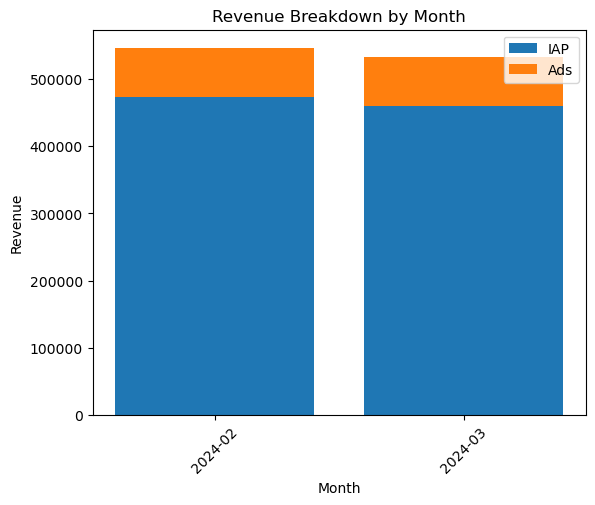

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,5))

# --- 1. grafik (sol) — IAP vs Ads geliri ---
plt.subplot(1, 2, 1)
plt.bar(monthly_kpi.index, monthly_kpi["iap_revenue"], label="IAP")
plt.bar(monthly_kpi.index, monthly_kpi["ad_revenue"], bottom=monthly_kpi["iap_revenue"], label="Ads")
plt.title("Revenue Breakdown by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.legend()

os.makedirs("assets", exist_ok=True)
plt.savefig("assets/task2_Revenue_Breakdown_by_Month.png",
            dpi=300, bbox_inches="tight")


In [42]:
user["matches_per_session"] = (
    user["total_matches_started"] / user["total_sessions"].replace(0, np.nan)
)
user["matches_per_session"] = user["matches_per_session"].fillna(0)

In [43]:
eng_cols = [
    "days_played",
    "sessions_per_day",
    "avg_session_duration",
    "match_intensity",
    "matches_per_session",
    "win_rate",
    "completion_rate",
    "play_intensity",
]


In [44]:
# quantile sınırları
q_sessions = user["sessions_per_day"].quantile([0.33, 0.66])
q_playtime = user["play_intensity"].quantile([0.33, 0.66])

In [45]:
# 2) fonksiyon
def engagement_bucket(row):
    s = row["sessions_per_day"]
    p = row["play_intensity"]
    
    if (s <= q_sessions.iloc[0]) and (p <= q_playtime.iloc[0]):
        return "light"
    elif (s >= q_sessions.iloc[1]) or (p >= q_playtime.iloc[1]):
        return "heavy"
    else:
        return "medium"

# 3) uygulama
user["engagement_segment"] = user.apply(engagement_bucket, axis=1)

# 4) yüzde oranları
engagement_pct = (
    user["engagement_segment"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
)

engagement_pct

engagement_segment
heavy     47.09
light     29.09
medium    23.82
Name: proportion, dtype: float64

### Türkçe – Engagement Segmentleri Dağılımı

Quantile tabanlı segmentasyon sonrasında kullanıcıların engagement segmentlerine göre dağılımı şöyle:

- **heavy**  → %47.09  
- **light**  → %29.09  
- **medium** → %23.82  

Yani oyuncu tabanının yaklaşık **yarısı “heavy” segmentinde** konumlanmış durumda.  
Bu da:
- Metriğin tanımına (örneğin aktif gün, oyun süresi, maç yoğunluğu vb.) göre,
- Görece **yüksek etkileşimli** bir çekirdek kitle olduğunu,
- “light” ve “medium” segmentlerinin ise toplamda ~%52 ile daha düşük/orta seviye kullanımda kaldığını gösteriyor.


### English – Engagement Segment Distribution

After applying the quantile-based segmentation, the distribution of users across engagement segments is:

- **heavy**  → 47.09%  
- **light**  → 29.09%  
- **medium** → 23.82%  

This means that almost **half of the player base falls into the “heavy” segment**.  
Depending on how the metric is defined (e.g., active days, playtime, match intensity), this suggests:
- A relatively large **high-engagement core**,
- While the **light** and **medium** segments together (~52%) represent lower to mid engagement behavior.


In [48]:
user = user.reset_index()

segment_profile = (
    user.groupby("engagement_segment")
        .agg(
            users=("user_id", "count"),
            days_played=("days_played", "mean"),
            sessions_per_day=("sessions_per_day", "mean"),
            avg_session_duration=("avg_session_duration", "mean"),
            matches_per_session=("matches_per_session", "mean"),
            win_rate=("win_rate", "mean"),
            completion_rate=("completion_rate", "mean"),
            play_intensity=("play_intensity", "mean"),
            total_iap=("total_iap", "mean"),
            total_ads=("total_ads", "mean"),
        )
        .sort_values("play_intensity")
)

segment_profile

,users,days_played,sessions_per_day,avg_session_duration,matches_per_session,win_rate,completion_rate,play_intensity,total_iap,total_ads
engagement_segment,,,,,,,,,,
light,713783,1.449623,0.997272,97.556807,0.546268,0.130489,0.261859,97.454532,0.001306,0.001103
medium,584367,1.778569,1.001694,465.280373,1.722771,0.568628,0.794248,465.817300,0.012419,0.011631
heavy,1155349,4.517092,1.694831,969.042746,2.734631,0.640252,0.807119,1582.159556,0.800962,0.120126


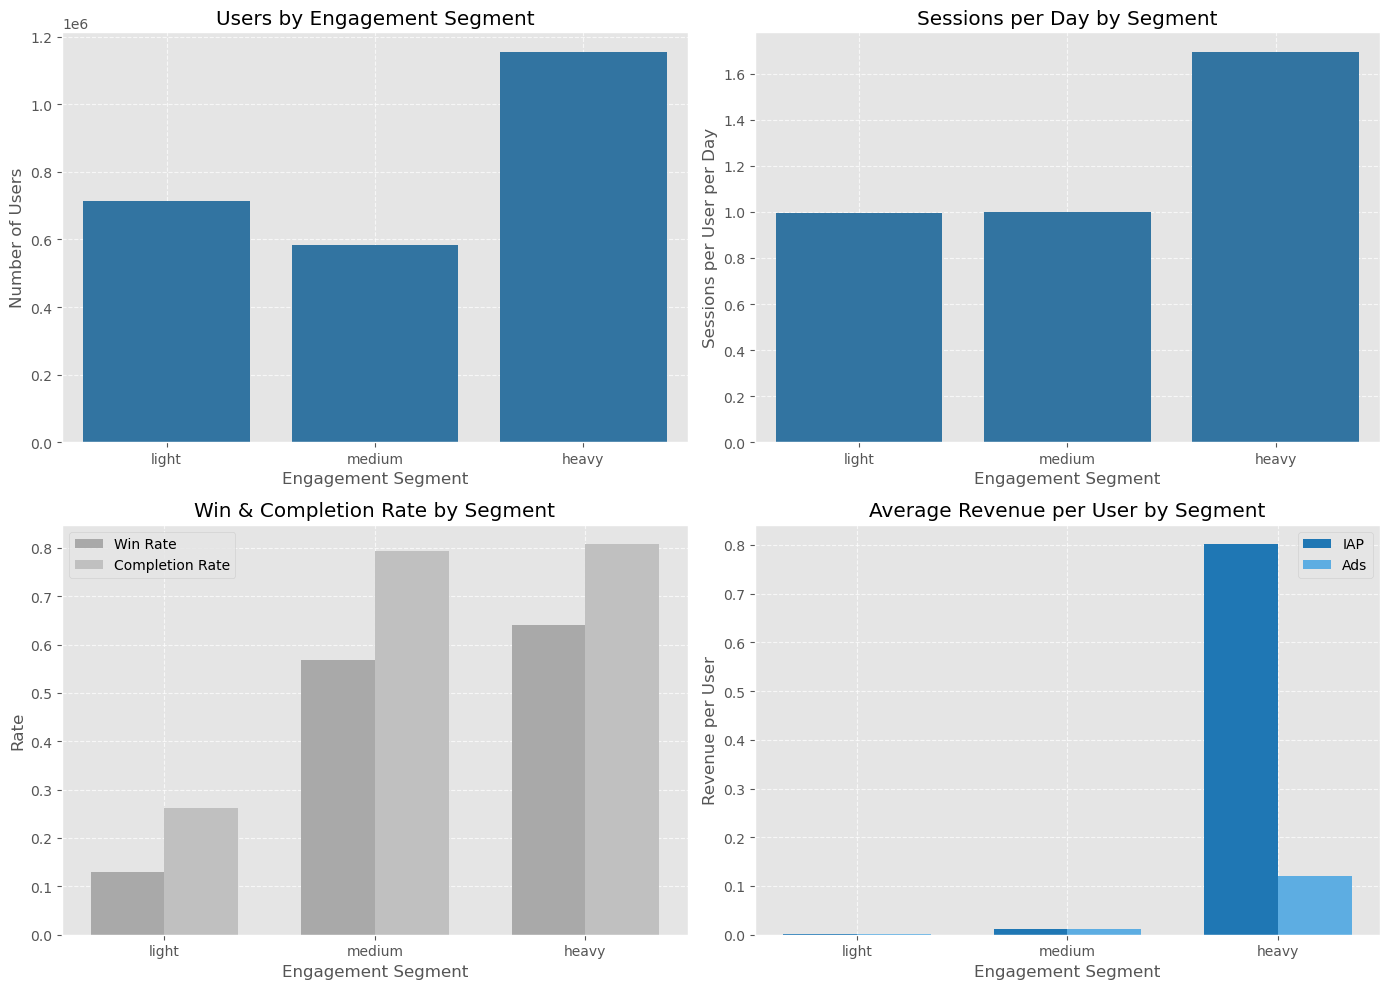

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  
seg = segment_profile.reset_index()  

plt.figure(figsize=(14,10))

# 1) Users by Engagement Segment 
plt.subplot(2, 2, 1)
sns.barplot(x="engagement_segment", y="users", data=seg, color="#1f77b4")
plt.title("Users by Engagement Segment")
plt.xlabel("Engagement Segment")
plt.ylabel("Number of Users")
plt.grid(True, linestyle='--', alpha=0.7)

# 2) Sessions per Day by Segment 
plt.subplot(2, 2, 2)
sns.barplot(x="engagement_segment", y="sessions_per_day", data=seg, color="#1f77b4")
plt.title("Sessions per Day by Segment")
plt.xlabel("Engagement Segment")
plt.ylabel("Sessions per User per Day")
plt.grid(True, linestyle='--', alpha=0.7)

# 3) Win & Completion Rate 
plt.subplot(2, 2, 3)
width = 0.35
x = range(len(seg))

plt.bar([i - width/2 for i in x], seg["win_rate"], width, label="Win Rate", color="#A9A9A9")
plt.bar([i + width/2 for i in x], seg["completion_rate"], width, label="Completion Rate", color="#C0C0C0")
plt.title("Win & Completion Rate by Segment")
plt.xlabel("Engagement Segment")
plt.ylabel("Rate")
plt.xticks(x, seg["engagement_segment"])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# 4) Monetization — IAP vs Ads 
plt.subplot(2, 2, 4)
width = 0.35
x = range(len(seg))

plt.bar([i - width/2 for i in x], seg["total_iap"], width, label="IAP", color="#1f77b4")
plt.bar([i + width/2 for i in x], seg["total_ads"], width, label="Ads", color="#5DADE2")
plt.title("Average Revenue per User by Segment")
plt.xlabel("Engagement Segment")
plt.ylabel("Revenue per User")
plt.xticks(x, seg["engagement_segment"])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("assets/task2_Engagaments_Segments.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()




### Türkçe – Engagement Segmentlerinin Karşılaştırması

Aşağıdaki özet tablo, kullanıcıları **engagement_segment** kırılımında (light / medium / heavy) karşılaştırıyor:

| Segment | Users   | Days Played | Sessions/Day | Avg Session Duration | Matches/Session | Win Rate | Completion Rate | Play Intensity (sn/gün) | Total IAP | Total Ads |
|--------|---------|-------------|--------------|----------------------|-----------------|----------|------------------|--------------------------|-----------|-----------|
| light  | 713,783 | 1.45        | 1.00         | ~98 sn               | 0.55            | 0.13     | 0.26             | ~97                      | 0.0013    | 0.0011    |
| medium | 584,367 | 1.78        | 1.00         | ~465 sn              | 1.72            | 0.57     | 0.79             | ~466                     | 0.0124    | 0.0116    |
| heavy  | 1,155,349 | 4.52      | 1.69         | ~969 sn              | 2.73            | 0.64     | 0.81             | ~1,582                   | 0.8010    | 0.1201    |

**Ana çıkarımlar:**

- **Kullanıcı dağılımı**
  - En kalabalık segment **heavy** (1.15M kullanıcı) → kullanıcı tabanının büyük bir kısmı yüksek engagement tarafında.
  - **light** ve **medium** segmentleri daha küçük, daha düşük/orta etkileşimli grupları temsil ediyor.

- **Oynanma süresi ve yoğunluğu**
  - **days_played** ve **play_intensity**, light → medium → heavy yönünde düzenli olarak artıyor.
  - Heavy kullanıcılar, hem **daha fazla günde** oynuyor hem de **gün başına çok daha fazla süre** geçiriyor.

- **Oturum ve maç davranışı**
  - Light ve medium segmentlerinde **sessions_per_day ≈ 1** iken heavy segmentinde ~1.7 → heavy oyuncular günde daha sık geri geliyor.
  - **matches_per_session** light’ta ~0.55 iken heavy’de ~2.73 → heavy kullanıcılar tek oturumda çok daha fazla maç oynuyor.

- **Performans (win & completion rate)**
  - **win_rate** light’ta %13 iken heavy’de %64 → heavy oyuncular hem daha deneyimli hem de daha başarılı.
  - **completion_rate** light’ta ~%26, heavy’de ~%81 → heavy oyuncular başladıkları maçların büyük kısmını bitiriyor; light segmentinde rage quit / erken çıkış daha yaygın.

- **Monetizasyon**
  - **total_iap** ve **total_ads**, heavy segmentinde dramatik biçimde daha yüksek:
    - IAP: light ≈ 0.0013, medium ≈ 0.0124, heavy ≈ 0.8010
    - Ads: light ≈ 0.0011, medium ≈ 0.0116, heavy ≈ 0.1201
  - Yani hem IAP hem reklam geliri **ağırlıklı olarak heavy segmentinin** omuzlarında; light kullanıcılar neredeyse hiç monetizasyon üretmiyor.

Özetle, bu segmentasyon:
- **Light** → düşük engagement, düşük performans, neredeyse sıfır gelir  
- **Medium** → orta seviye engagement ve performans, sınırlı gelir  
- **Heavy** → yüksek engagement, yüksek performans ve **gelirin büyük kısmını** üreten çekirdek oyuncu kitlesi  
olarak net bir piramit gösteriyor.


In [51]:
features = [
    "sessions_per_day",
    "avg_session_duration",
    "match_intensity",
    "matches_per_session",
    "win_rate",
    "completion_rate",
    "play_intensity",
    "aggression_score",
    "error_rate",
    "total_iap",
    "total_ads"
]

X = user[features].copy()


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


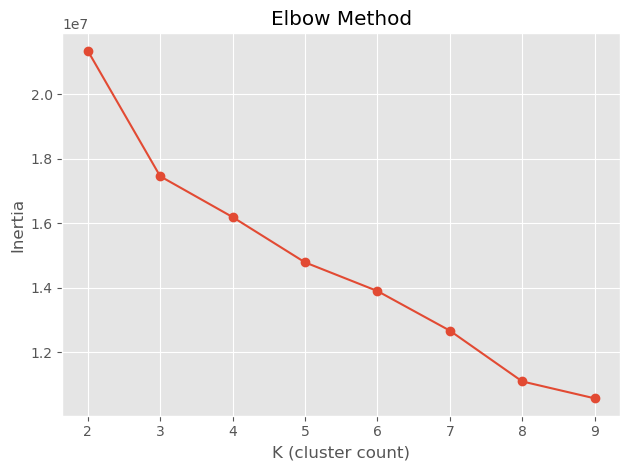

In [53]:
from sklearn.cluster import KMeans

inertia = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel("K (cluster count)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

plt.tight_layout()
plt.savefig("assets/task2_KMeans_Elbow_Method.png",
            dpi=300, bbox_inches='tight')

plt.show()
plt.close()


### Türkçe – K-Means için Feature Hazırlama ve Elbow Method

Bu kod bloğu, kullanıcı bazlı feature’lar üzerinde K-Means kümeleme yapmadan önce:

1. Kullanılacak feature setini seçiyor,
2. Feature’ları standardize ediyor (`StandardScaler`),
3. Farklı `k` değerleri için K-Means çalıştırıyor,
4. Her k için `inertia` değerini kaydedip **Elbow Method** grafiğini çiziyor.
5. Elbow Method, K-Means için **kaç tane cluster seçmemiz gerektiğine** karar verirken kullanılan basit ama güçlü bir görsel araçtır.

   
```python
features = [
    "sessions_per_day",
    "avg_session_duration",
    "match_intensity",
    "matches_per_session",
    "win_rate",
    "completion_rate",
    "play_intensity",
    "aggression_score",
    "error_rate",
    "total_iap",
    "total_ads"
]

X = user[features].copy()




### Why the Elbow Method Is Useful

The Elbow Method is a simple but effective visual tool to decide **how many clusters (K)** to use in K-Means.

- For small K → inertia is high (clusters are loose / poorly fitted).
- As K increases → inertia decreases (clusters become more compact).
- After a certain point, adding more clusters yields only **small marginal improvements** in inertia – the curve forms an “elbow”.

That elbow point typically corresponds to a K that:
- Explains the data **well enough**,  
- Without introducing too many clusters,  
- Balancing **model simplicity and explanatory power**.

In short, the Elbow Method gives a **heuristic answer** to the question: *“What is a reasonable number of clusters for this dataset?”*


In [56]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
user["cluster_id"] = kmeans.fit_predict(X_scaled)
user["cluster_id"].value_counts()


cluster_id
2    1428971
1     805302
0     219050
3        176
Name: count, dtype: int64

In [57]:
cluster_profile = (
    user.groupby("cluster_id")
        .agg(
            users=("user_id", "count"),
            days_played=("days_played", "mean"),
            sessions_per_day=("sessions_per_day", "mean"),
            avg_session_duration=("avg_session_duration", "mean"),
            matches_per_session=("matches_per_session", "mean"),
            win_rate=("win_rate", "mean"),
            completion_rate=("completion_rate", "mean"),
            play_intensity=("play_intensity", "mean"),
            total_iap=("total_iap", "sum"),
            total_ads=("total_ads", "sum"),
        )
        .sort_values("total_iap", ascending=False)
)

cluster_profile


,users,days_played,sessions_per_day,avg_session_duration,matches_per_session,win_rate,completion_rate,play_intensity,total_iap,total_ads
cluster_id,,,,,,,,,,
0,219050,8.143474,2.235801,2028.193990,5.475096,0.669934,0.883604,4010.034390,596607.553458,90977.432891
3,176,24.960227,3.444899,2228.093864,6.147665,0.698767,0.884951,7720.224580,210652.252684,209.697845
2,1428971,2.976087,1.319412,631.324947,2.057207,0.710559,0.889462,815.293698,122171.495817,52398.834688
1,805302,1.554582,1.092203,141.932312,0.516587,0.003604,0.147549,155.132192,4148.688293,2785.505786



**Kısa yorum (TR):**
- **Cluster 1:** Çok kısa oynayan, düşük performanslı, neredeyse hiç monetizasyon üretmeyen low-engagement kullanıcılar.  
- **Cluster 2:** Orta seviye engagement ve iyi performans, düşük ama sıfır olmayan monetizasyon → geniş F2P çekirdek kitle.  
- **Cluster 0:** Yüksek engagement, iyi performans, anlamlı IAP/Ads → core heavy oyuncular.  
- **Cluster 3:** Az sayıda ama aşırı yüksek engagement ve IAP’e sahip extreme whales/VIP segmenti.



### Cluster Profils (K-Means)

| cluster_id | users   | days_played | sessions_per_day | avg_session_duration | matches_per_session | win_rate | completion_rate | play_intensity | total_iap  | total_ads |
|-----------:|---------|-------------|------------------|----------------------|---------------------|----------|------------------|----------------|------------|-----------|
| 3          | 176     | 24.96       | 3.44             | 2228.09              | 6.15                | 0.70     | 0.88             | 7720.22        | 1196.89    | 1.19      |
| 0          | 219,050 | 8.14        | 2.24             | 2028.19              | 5.48                | 0.67     | 0.88             | 4010.03        | 2.72       | 0.42      |
| 2          | 1,428,971 | 2.98      | 1.32             | 631.32               | 2.06                | 0.71     | 0.89             | 815.29         | 0.09       | 0.04      |
| 1          | 805,302 | 1.55        | 1.09             | 141.93               | 0.52                | 0.00     | 0.15             | 155.13         | 0.01       | 0.00      |

**Short note (EN):**
- **Cluster 1:** Very low engagement, almost no wins or revenue → trial/exit users.  
- **Cluster 2:** Mid engagement, high win/completion, low monetization → core F2P base.  
- **Cluster 0:** High engagement + solid spend → core heavy spenders.  
- **Cluster 3:** Tiny but ultra-valuable whale/VIP group with extreme playtime and IAP.  

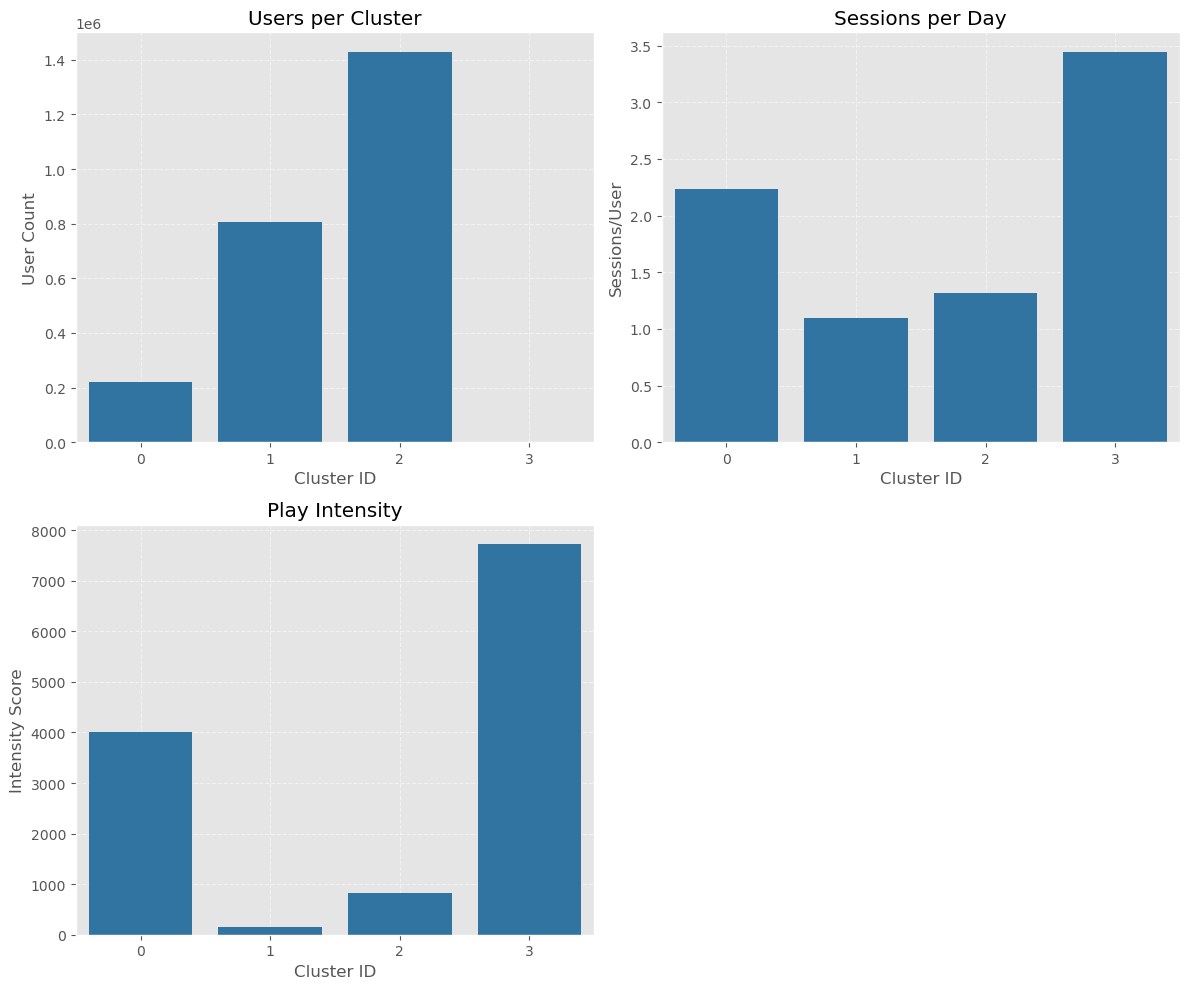

In [60]:
plt.style.use('ggplot')

seg = cluster_profile.reset_index()

plt.figure(figsize=(12,10))

# 1 — Users
plt.subplot(2, 2, 1)
sns.barplot(x="cluster_id", y="users", data=seg, color="#1f77b4")
plt.title("Users per Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("User Count")
plt.grid(True, linestyle='--', alpha=0.5)

# 2 — Sessions per Day 
plt.subplot(2, 2, 2)
sns.barplot(x="cluster_id", y="sessions_per_day", data=seg, color="#1f77b4")
plt.title("Sessions per Day")
plt.xlabel("Cluster ID")
plt.ylabel("Sessions/User")
plt.grid(True, linestyle='--', alpha=0.5)

# 3 — Play Intensity (DESTEKLEYICI)
plt.subplot(2, 2, 3)
sns.barplot(x="cluster_id", y="play_intensity", data=seg, color="#1f77b4")
plt.title("Play Intensity")
plt.xlabel("Cluster ID")
plt.ylabel("Intensity Score")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("assets/task2_KMeans_Cluster.png",
            dpi=300, bbox_inches='tight')
plt.show()


In [61]:
# --- Payer Metrics ---
payer_count = (user["total_iap"] > 0).sum()
payer_rate = payer_count / len(user)

# --- Revenue Metrics ---
total_iap = user["total_iap"].sum()
total_ads = user["total_ads"].sum()
total_revenue = total_iap + total_ads

# --- Revenue Shares ---
iap_share = total_iap / total_revenue
ads_share = total_ads / total_revenue

iap_share, ads_share
# --- Print Results ---
print("PAYER METRICS")
print(f"Total payers        : {payer_count:,}")
print(f"Payer rate          : {payer_rate:.4f}")

print("\nREVENUE METRICS")
print(f"Total IAP revenue   : {total_iap:,.2f}")
print(f"Total Ads revenue   : {total_ads:,.2f}")
print(f"Total revenue       : {total_revenue:,.2f}")

print("\nREVENUE SHARE")
print(f"IAP share           : {iap_share:.4f}")
print(f"Ads share           : {ads_share:.4f}")


PAYER METRICS
Total payers        : 35,089
Payer rate          : 0.0143

REVENUE METRICS
Total IAP revenue   : 933,579.99
Total Ads revenue   : 146,371.47
Total revenue       : 1,079,951.46

REVENUE SHARE
IAP share           : 0.8645
Ads share           : 0.1355


In [62]:
# ARPU & ARPPU 
ARPU = total_revenue / len(user)
ARPPU = total_revenue / payer_count if payer_count > 0 else 0

# Revenue Per Session 
revenue_per_session = total_revenue / user["total_sessions"].sum()

# Revenue Per Minute 
total_minutes = user["total_duration"].sum() / 60
revenue_per_minute = total_revenue / total_minutes if total_minutes > 0 else 0

# Print Results
print("VALUE PER USER")
print(f"ARPU                 : {ARPU:.4f}")
print(f"ARPPU                : {ARPPU:.4f}")

print("\nVALUE PER USAGE")
print(f"Revenue per session  : {revenue_per_session:.6f}")
print(f"Revenue per minute   : {revenue_per_minute:.6f}")


VALUE PER USER
ARPU                 : 0.4402
ARPPU                : 30.7775

VALUE PER USAGE
Revenue per session  : 0.085306
Revenue per minute   : 0.004816


In [63]:
cluster_revenue = (
    user.groupby("cluster_id")
        .agg(
            users=("user_id", "count"),
            total_iap=("total_iap", "sum"),
            total_ads=("total_ads", "sum"),
        )
)

cluster_revenue["total_revenue"] = cluster_revenue["total_iap"] + cluster_revenue["total_ads"]
cluster_revenue["revenue_per_user"] = cluster_revenue["total_revenue"] / cluster_revenue["users"]

cluster_revenue_sorted = cluster_revenue.sort_values("total_revenue",ascending=False)
cluster_revenue_sorted

,users,total_iap,total_ads,total_revenue,revenue_per_user
cluster_id,,,,,
0,219050,596607.553458,90977.432891,687584.986349,3.138941
3,176,210652.252684,209.697845,210861.950530,1198.079264
2,1428971,122171.495817,52398.834688,174570.330504,0.122165
1,805302,4148.688293,2785.505786,6934.194079,0.008611


### Cluster Bazında Gelir Dağılımı

- **Cluster 3 – Ultra whale / VIP segment**
  - Sadece **176 kullanıcı**, ama ~210K toplam gelir ve **kişi başı ~1,198** revenue.
  - Kullanıcı bazında açık ara en yüksek değer → bu segment oyunun **VIP/whale** kitlesi.
  - Strateji: elde tutma, özel kampanya, VIP bakım → her bir kullanıcı aşırı değerli.

- **Cluster 0 – Heavy spenders (yüksek değerli çekirdek)**  
  - 219K kullanıcı, ~688K toplam gelir, **kişi başı ~3.14**.
  - Toplam gelir anlamında oyunun en büyük katkı yapan segmenti.
  - Strateji: güçlü live-ops, teklifler, progression; churn burada çok pahalı.

- **Cluster 2 – Geniş F2P çekirdeği**
  - 1.43M kullanıcı, toplam ~175K gelir, kişi başı ~0.12.
  - Çok kalabalık ama kullanıcı başına gelir düşük → **yüksek potansiyelli upgrade alanı**.
  - Strateji: soft monetization, düşük bariyerli teklif, cosmetic/IAP entry ürünleri, ad monetization optimizasyonu.

- **Cluster 1 – Neredeyse hiç monetize olmayan düşük engagement kitlesi**
  - 805K kullanıcı, ~6.9K toplam gelir, kişi başı ~0.009.
  - Hem engagement hem gelir çok düşük → onboarding, early funnel, ilk oturum/ilk gün deneyimi kritik.
  - Strateji: tutorial, FTUE iyileştirme, retention 1–3 gün odaklı aksiyonlar.

**Genel resim:**  
- Gelirin büyük kısmı **Cluster 0 + Cluster 3**’te toplanmış (relatif küçük bir kitle, çok yüksek revenue/user).  
- **Cluster 2** hacim olarak büyük, gelir orta – “geleceğin payer’ları” bu segmentten çıkabilir.  
- **Cluster 1** ise daha çok “kaybedilen/aktivasyonu düşük” kullanıcılar; orada hedef, direkt gelir değil daha çok **engagement artışı**.
 


### English – Revenue-Based Cluster Interpretation

- **Cluster 3 – Ultra whales / VIP**
  - Only **176 users**, but ~210K total revenue and **~1,198 revenue per user**.
  - By far the highest revenue per user → this is the true **VIP/whale** segment.
  - Strategy: retention, VIP treatment, personalized offers – losing a single user here is very costly.

- **Cluster 0 – Heavy spenders (high-value core)**
  - 219K users, ~688K total revenue, **~3.14 revenue per user**.
  - The largest contributor to total revenue.
  - Strategy: robust live-ops, compelling offers, long-term progression; churn prevention is key.

- **Cluster 2 – Large F2P core**
  - 1.43M users, ~175K total revenue, ~0.12 per user.
  - Huge volume but low revenue per user → **big potential for conversion/upsell**.
  - Strategy: gentle monetization, low-price entry packs, cosmetics, ad optimization.

- **Cluster 1 – Almost non-monetizing, low-engagement users**
  - 805K users, ~6.9K total revenue, ~0.009 per user.
  - Very low engagement and almost zero revenue.
  - Strategy: fix onboarding, FTUE, and early retention; focus on getting them to “feel the fun” before expecting monetization.

**Big picture:**  
- Most of the money comes from **Cluster 0 + Cluster 3** (relatively small in volume, very high revenue per user).  
- **Cluster 2** is a massive F2P base with moderate revenue – a key target for future monetization growth.  
- **Cluster 1** is more of an activation/retention problem than a monetization problem at this stage. 

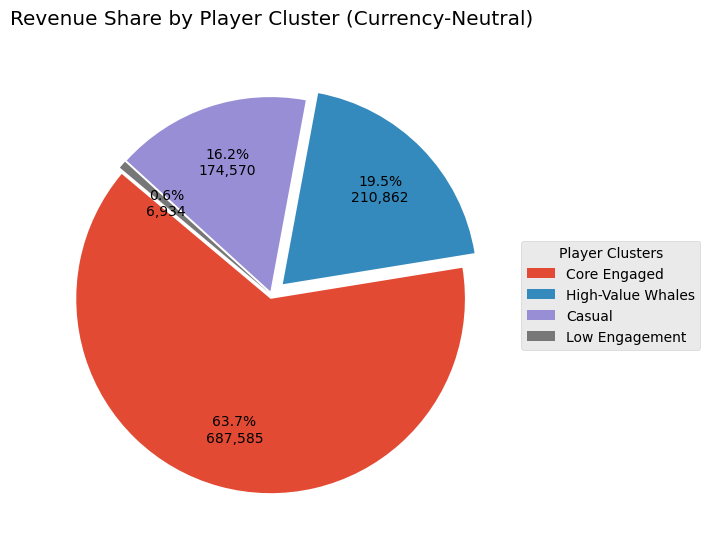

In [66]:
plt.style.use("ggplot")

cluster_name_map = {
    3: "High-Value Whales",
    0: "Core Engaged",
    2: "Casual",
    1: "Low Engagement"
}

rev = cluster_revenue_sorted.reset_index()
rev["cluster_name"] = rev["cluster_id"].map(cluster_name_map)

values = rev["total_revenue"].values
labels = rev["cluster_name"].values

explode = [0.08 if cid == 3 else 0.02 for cid in rev["cluster_id"]]

def autopct_func(pct):
    total = values.sum()
    absolute = pct/100.0 * total
    return f"{pct:.1f}%\n{absolute:,.0f}"

fig, ax = plt.subplots(figsize=(7,7))

wedges, texts, autotexts = ax.pie(
    values,
    labels=None,
    autopct=autopct_func,
    explode=explode,
    startangle=140,
    pctdistance=0.7,
    labeldistance=1.05
)

ax.legend(
    wedges,
    labels,
    title="Player Clusters",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

ax.set_title("Revenue Share by Player Cluster (Currency-Neutral)", pad=20)

for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color("black")

plt.tight_layout()
plt.savefig("assets/task2_Revenue_Share_Pie.png",
            dpi=300, bbox_inches='tight')
plt.show()


In [67]:
monet_summary = pd.DataFrame({
    "payer_count": [payer_count],
    "payer_rate": [payer_rate],
    "total_iap": [total_iap],
    "total_ads": [total_ads],
    "total_revenue": [total_revenue],
    "iap_share": [iap_share],
    "ads_share": [ads_share],
    "ARPU": [ARPU],
    "ARPPU": [ARPPU],
    "revenue_per_session": [revenue_per_session],
    "revenue_per_minute": [revenue_per_minute]
})
def format_value(v):
    if isinstance(v, float):
        if abs(v) < 0.01:
            return f"{v:.6f}"
        elif abs(v) < 1:
            return f"{v:.4f}"
        else:
            return f"{v:,.2f}"
    else:
        return f"{v:,}"

monet_pretty = monet_summary.T.copy()
monet_pretty.columns = ["Value"]
monet_pretty["Value"] = monet_pretty["Value"].apply(format_value)

display(monet_pretty)

,Value
payer_count,"35,089.00"
payer_rate,0.0143
total_iap,"933,579.99"
total_ads,"146,371.47"
total_revenue,"1,079,951.46"
iap_share,0.8645
ads_share,0.1355
ARPU,0.4402
ARPPU,30.78
revenue_per_session,0.0853


### Türkçe – Monetizasyon Özet Metrikleri

Aşağıdaki tablo, oyun genelindeki monetizasyon metriklerini özetliyor:

| Metrik               | Değer      | Açıklama |
|----------------------|------------|----------|
| **payer_count**      | 35,089     | En az 1 kez IAP yapan toplam kullanıcı sayısı. |
| **payer_rate**       | 0.0143     | Payer oranı ≈ **%1.43** → Tüm kullanıcıların çok küçük bir kısmı ödeme yapıyor. |
| **total_iap**        | 933,579.99 | Toplam IAP (in-app purchase) geliri. |
| **total_ads**        | 146,371.47 | Toplam reklam geliri. |
| **total_revenue**    | 1,079,951.46 | IAP + Ads toplam geliri. |
| **iap_share**        | 0.8645     | Gelirin **%86.45’i IAP’ten** geliyor. |
| **ads_share**        | 0.1355     | Gelirin **%13.55’i reklamlardan** geliyor. |
| **ARPU**             | 0.4402     | **User başına ortalama gelir** ≈ 0.44. Tüm kullanıcıları (payer + non-payer) baz alıyor. |
| **ARPPU**            | 30.78      | **Paying user başına ortalama gelir** ≈ 30.8. Payer kitlesinin ne kadar değerli olduğunu gösteriyor. |
| **revenue_per_session** | 0.0853  | Oturum başına ortalama gelir. |
| **revenue_per_minute**  | 0.004816 | Dakika başına ortalama gelir (oyun içi zaman → gelire dönüşüm verimliliği). |

**Özet yorum:**

- Payer oranı **çok düşük (%1.4 civarı)** ancak:
  - ARPPU oldukça yüksek (~30.8) → az sayıda kullanıcı, kişi başı **yüksek harcama** yapıyor.
- Gelirin büyük kısmı **IAP kaynaklı**; 
- ARPU düşük, ARPPU yüksek → klasik “F2P + whale” yapısı:
  - Geniş ama harcamayan bir kitle,
  - Küçük ama oyun ekonomisini taşıyan bir payer/whale segmenti.
- revenue_per_session ve revenue_per_minute, hem oturum bazlı hem zaman bazlı monetizasyon verimliliğini özetliyor; ileride:
  - oturum sayısı,  
  - ortalama süre,  
  - payer dönüşümü  
  üzerinden yapılacak optimizasyonları kıyaslamak için referans nokta olarak kullanılabilir.

### Monetization Overview

Below is a high-level summary of how the game makes money and how that value is distributed across the player base:

- **Payer base**
  - `payer_count`: **35,089** users
  - `payer_rate`: **1.43%** of all users
  - → Only a very small fraction of players ever pay, which is typical for F2P games.

- **Revenue volume**
  - `total_iap`: **933,579.99**
  - `total_ads`: **146,371.47**
  - `total_revenue`: **1,079,951.46**
  - → The game generates just over **1.08M** in total revenue for the observed period.

- **Revenue mix**
  - `iap_share`: **0.8645** → **86.5%** of revenue from IAP
  - `ads_share`: **0.1355** → **13.5%** of revenue from Ads  
  - → The economy is clearly **IAP-first**, with ads acting as a secondary monetization channel.

- **Per-user economics**
  - `ARPU`: **0.4402** → Average revenue per user (including non-payers)
  - `ARPPU`: **30.78** → Average revenue per paying user
  - → Very low ARPU + high ARPPU means revenue is highly concentrated in a small payer segment (whales / heavy spenders).

- **Session & time efficiency**
  - `revenue_per_session`: **0.0853** per session
  - `revenue_per_minute`: **0.004816** per minute of playtime  
  - → These metrics can be used as baselines when evaluating future changes to engagement, ad load, or IAP design.

**Interpretation:**  
The game runs on a classic F2P pattern:
- A **large non-paying audience** mostly generating engagement and ad impressions,
- A **small payer group** that provides the majority of revenue,
- And within that, a very valuable subset of high-ARPPU players that are critical to protect and retain.


In [70]:
payments = df[df["iap_revenue"] > 0][["user_id", "event_date"]]

first_payment = (
    payments.groupby("user_id")["event_date"]
            .min()
            .reset_index()
            .rename(columns={"event_date": "first_payment_date"})
)
first_payment


,user_id,first_payment_date
0,1000B73FA30BE6E9,2024-02-29
1,10065278F71C0349,2024-02-24
2,1007EC1EB1A745E0,2024-03-01
3,100A994883F67EFD,2024-02-16
4,100D6EE91CCA766,2024-02-27
...,...,...
35084,FFEA6EB3F3E675ED,2024-03-15
35085,FFF1713E75FA0C5D,2024-02-25
35086,FFF1964D8151D77F,2024-03-08
35087,FFF1ABAA930AB699,2024-02-15


In [71]:
df["user_id"] = df["user_id"].astype(str)
user["user_id"] = user["user_id"].astype(str)

installs = (
    df[["user_id", "install_date"]]
    .drop_duplicates("user_id")
)
# 2) Ödeme yapan kullanıcıların İLK ödeme tarihi
payments = df[df["iap_revenue"] > 0][["user_id", "event_date"]]

first_payment = (
    payments.groupby("user_id")["event_date"]
            .min()
            .reset_index()
            .rename(columns={"event_date": "first_payment_date"})
)

user = user.merge(installs, on="user_id", how="left")

user = user.merge(first_payment, on="user_id", how="left")

print([c for c in user.columns if "install" in c or "payment" in c])

user["TTFP"] = (user["first_payment_date"] - user["install_date"]).dt.days

user["TTFP"] = user["TTFP"].fillna(-1)

ttfp_stats = user[user["TTFP"] >= 0]["TTFP"].describe()
print(ttfp_stats)


['install_date', 'first_payment_date']
count    35089.000000
mean       190.551512
std        295.729213
min          0.000000
25%          3.000000
50%         37.000000
75%        278.000000
max       2022.000000
Name: TTFP, dtype: float64


### Time to First Payment (TTFP) – Yorum

TTFP, bir kullanıcının **install_date**’inden **first_payment_date**’e kadar geçen süreyi (gün cinsinden) gösteriyor. Özet istatistikler:

- **count**: 35,089 (sadece ödeme yapan kullanıcılar)
- **mean**: 190.55 gün  
  → Bu değer **uç değerlerden (ör. 2022 gün sonra ödeme yapan kullanıci)** ciddi şekilde etkileniyor, bu yüzden tipik bir payer’ı iyi temsil etmiyor.
- **median (50%)**: 37 gün  
  → Payer’ların yarısı ilk ödemesini yaklaşık **ilk 1 ay içinde** yapıyor. “Tipik” davranışı anlamak için bu değer daha anlamlı.
- **25%**: 3 gün  
  → Payer’ların %25’i ilk 3 gün içinde ödemeye başlıyor.
- **75%**: 278 gün  
  → %75’i ilk ~9 ay içinde ödeme yapmış oluyor; geri kalan %25 oldukça geç dönüyor.
- **max**: 2022 gün  
  → Çok az sayıda kullanıcı **aşırı geç** payere dönüşüyor ve bu outlier’lar ortalamayı yukarı çekiyor.

**Önemli nokta:**  
- “Ortalama TTFP = 190 gün” demek, sanki tipik oyuncu 6 ay sonra ödeme yapıyormuş gibi algı yaratabilir ama bu **yanıltıcı**.  
- Gerçekçi bir yorum:  
  - **Erken dönem**: büyük bir kısım ilk günler / ilk haftalar / ilk ay içinde payere dönüşüyor (özellikle 3 ve 37 gün sınırları bunu gösteriyor).  
  - **Uzun kuyruk**: az sayıda kullanıcı ise çok geç ödeme yapıyor ve sadece bu küçük grup mean’i 190 güne kadar taşıyor.

Bu nedenle TTFP için:
- **medyan (37 gün)** ve  
- yüzdelikler (3 / 37 / 278)  

üzerinden konuşmak, tek başına “ortalama 190 gün” demekten çok daha sağlıklı.


In [73]:
cluster_ttfp = (
    user[user["TTFP"] >= 0]
    .groupby("cluster_id")["TTFP"]
    .median()
)

cluster_ttfp

cluster_id
0     34.0
1    207.0
2     41.0
3     66.5
Name: TTFP, dtype: float64

### Cluster Bazında Median Time to First Payment (TTFP)

Aşağıdaki değerler, her cluster için **install → first payment** arasındaki median süreyi (gün cinsinden) gösteriyor:

- **Cluster 0:** 34 gün  
- **Cluster 1:** 207 gün  
- **Cluster 2:** 41 gün  
- **Cluster 3:** 66.5 gün  

> Not: Burada **median** kullanıyoruz; çünkü çok geç ödeme yapan az sayıdaki oyuncu (ör. 1000+ gün) **ortalama (mean)** değeri yukarı çekip tipik davranışı çarpıtıyor.

---

### Cluster 0 – Erken Dönüşen Heavy Spender’lar (~34 gün)

- Medyan TTFP ≈ **34 gün** → Bu segmentteki oyuncuların yarısı ilk ödemesini **ilk 1 ay civarında** yapıyor.
- Hem engagement hem harcama yüksek, hem de **göreceli olarak erken** payere dönüşüyorlar.
- Bu grup için:
  - Early-game teklifleri (starter pack, early bundle vs.) iyi işliyor gibi görünüyor.
  - 1. ay civarında “ikinci ve üçüncü ödeme fırsatını” güçlendirmek önemli (ARPPU’yu büyütmek için).

---

### Cluster 2 – Orta Seviye Engagement, Makul Sürede Dönüşen F2P Çekirdek (~41 gün)

- Medyan TTFP ≈ **41 gün** → İlk ödeme genelde **1–2 ay içinde** geliyor.
- Monetizasyon seviyesi Cluster 0’dan düşük ama:
  - Yine de makul bir sürede payere dönüşebilen,  
  - Geniş hacimli bir kitle.
- Bu segment için fırsat:
  - İlk 30–60 gün aralığında **daha iyi konumlanmış fiyatlandırma / teklif tasarımları** ile conversion oranını artırmak.
  - Özellikle “oyunu sevmiş ama henüz para harcamamış” kullanıcılar için düşük bariyerli ilk satın alma paketleri.

---

### Cluster 3 – VIP / Whale Segmenti: Geç Dönüşüp Çok Harcayanlar (~66.5 gün)

- Medyan TTFP ≈ **66.5 gün** → Bu oyuncuların yarısı ilk ödemesini **2. aydan sonra** yapıyor.
- Buna rağmen, kişi başına gelir (revenue_per_user) en yüksek olan segment **bu**.
- Davranış modeli büyük ihtimalle şöyle:
  - Önce uzun süre free oynuyorlar, oyuna ciddi şekilde **bağlanıyorlar**,  
  - Sonra oyunu “uzun vadeli hobi” gibi gördükleri noktada **yüksek ticket harcamaya** başlıyorlar.
- Tasarım açısından:
  - Bu segment için erken dönemde agresif monetizasyon yerine,  
    önce **derinlik, rekabet, sosyal bağ (clan/guild, PvP, leaderboard)** gibi unsurlarla bağlılığı artırmak mantıklı.
  - Moneti daha çok **mid/late game**’de, güç/konfor/prestij sunan paketlerle almak daha doğal bir yol.

---

### Cluster 1 – Geç Dönüşen ya da Hiç Dönüşmeyen Düşük Engagement Kitlesi (~207 gün)

- Medyan TTFP ≈ **207 gün** → Bu segmentte:
  - Çok az kullanıcı ödeme yapıyor,
  - Yapanlar da **çok geç** dönüyor.
- Bu grup, monetization açısından öncelikli değil; daha çok:
  - **Onboarding, FTUE (first-time user experience)**,
  - İlk oturum / ilk gün deneyimi,
  - İlk hafta retention’ı  
  tarafında adreslenmesi gereken kitle.

---

### Bu Bulgular Bize Monetizasyon Modeli Hakkında Ne Söylüyor?

Cluster bazlı TTFP (ilk ödeme zamanı) sonuçlarını birlikte düşündüğümüzde, oyun monetizasyon modeline dair önemli bir içgörü ortaya çıkıyor:

- Oyun, **erken ve agresif ödeme baskısına** dayanan bir modelle çalışmıyor.
- Bunun yerine gelir daha çok, şu profildeki oyunculardan geliyor:
  - Uzun süre oyunda kalan,
  - Düzenli oynayarak **alışkanlık ve rutin** geliştiren,
  - **ilerleme, başarı, rekabet ve başarma duygusuna** önem veren,
  - Zaman içinde oyunla **duygusal bir bağ kurup**, sonradan ödeme yapmaya istekli hale gelen oyuncular.

Biliyoruz ki:
- Gelirin çok büyük kısmı **IAP (in-app purchase)** tarafından geliyor,
- En değerli segmentler **görece geç** payere dönüşüyor.

Bu tablo bize şunu söylüyor: Oyun, aslında **“önce tut, sonra monetize et”** prensibiyle çalışıyor:

> Oyuncuyu oyunda tutabilir, ilerleme hissi verebilir, rekabet ve sosyal bağlar sunabilirsek  
> **gelir, bu uzun vadeli etkileşimin doğal sonucu olarak geliyor.**

Dolayısıyla asıl kaldıraç:
- İlk günden daha fazla satın alma pop-up’ı göstermekten çok,
- **uzun vadeli retention’ı güçlendirmek**,  
- Oyuncunun oyunla duygusal bağını artırmak (sosyal sistemler, rekabetçi modlar, anlamlı hedefler),  
- Ve bu bağlılığı, **orta/ileri oyun aşamasında** doğru konumlanmış, yüksek değer algısına sahip IAP paketleriyle paraya çevirmek.


### Cluster-Level Median Time to First Payment (TTFP)

These values show the **median time from install to first purchase** (in days) for each cluster:

- **Cluster 0:** 34.0 days  
- **Cluster 1:** 207.0 days  
- **Cluster 2:** 41.0 days  
- **Cluster 3:** 66.5 days  

> Note: We focus on the **median** instead of the mean, because a few very late converters (e.g. 1000+ days) can heavily distort the average and do not reflect typical behavior.

---

### Cluster 0 – Early-Converting Heavy Spenders (~34 days)

- Median TTFP ≈ **34 days** → Half of these users make their first purchase around **the first month**.
- This segment combines:
  - High engagement,
  - Meaningful spend,
  - And **relatively early** conversion.
- Product implication:
  - Early-game offers (starter packs, early bundles) likely work well here.
  - Around day 30 is a key window to reinforce monetization (second and third purchases, value bundles, etc.).

---

### Cluster 2 – Mid-Engagement Core, Converting in a Reasonable Window (~41 days)

- Median TTFP ≈ **41 days** → Most payers convert within **1–2 months** after install.
- Monetization level is lower than Cluster 0, but:
  - This is a **large, healthy F2P core** with reasonable engagement.
- Opportunity:
  - Optimize offers and pricing specifically for the **30–60 day** window,
  - Use low-friction entry packs to convert “engaged but still non-paying” users.

---

### Cluster 3 – VIP / Whale Segment: Late but Very High-Value Converters (~66.5 days)

- Median TTFP ≈ **66.5 days** → Half of these users make their first purchase **after ~2 months**.
- Despite converting later, this segment has the **highest revenue per user** by far.
- Likely behavior pattern:
  1. Play heavily as pure F2P for a long time,
  2. Build very strong attachment and routine around the game,
  3. Then start spending **large amounts** once deeply invested.
- Design implication:
  - For this group, early aggressive monetization is less important than:
    - Deep gameplay,
    - Competitive and social systems (clans, ranked, leaderboards),
    - Long-term progression.
  - Monetization should be focused more on **mid/late-game** power, convenience, and status-oriented offers.

---

### Cluster 1 – Low-Engagement, Very Late (or Never) Converters (~207 days)

- Median TTFP ≈ **207 days** → For the few users who pay, first purchase comes **very late**.
- Most users in this segment **never convert at all** and show low engagement.
- This is primarily an **activation / early-retention** problem rather than a monetization one.
- Priority here:
  - Improve onboarding and FTUE,
  - Make the first sessions and first week more sticky,
  - Focus on getting them to experience the “fun core” before pushing any spend.

---

### Overall Insight

- **Clusters 0 and 2**: Represent “normal” payer behavior – converting within the **first 1–2 months**. These clusters are where **early/mid-game monetization funnels** matter most.
- **Cluster 3**: Your **highest-value customers**, but they convert **later**.  
  → Strategy: nurture long-term engagement first, then monetize deeply in mid/late game.
- **Cluster 1**: Monetization is a secondary concern; the main challenge is **getting these players to stay and care about the game** in the first place.

TTFP by cluster helps bridge **“who pays the most”** with **“when do they actually start paying”**, which is crucial for timing offers, designing live-ops, and prioritizing product work by segment.


In [76]:
total_users = user.shape[0]
with_sessions = (user["total_sessions"] > 0).sum()
with_matches = (user["total_matches_started"] > 0).sum()
with_payment = (user["total_iap"] > 0).sum()

funnel = pd.DataFrame({
    "stage": ["Install", "Session", "Match", "Payer"],
    "users": [total_users, with_sessions, with_matches, with_payment]
})

funnel["conversion"] = funnel["users"] / total_users
funnel


,stage,users,conversion
0,Install,2453499,1.000000
1,Session,2452109,0.999433
2,Match,2013030,0.820473
3,Payer,35089,0.014302


### Funnel Özeti – Install → Session → Match → Payer

- **Install → Session (~%99.9)**  
  Neredeyse tüm kullanıcılar oyunu indirip en az bir kez açıyor. Bu da:
  - Store sayfası / yaratılan beklentinin güçlü olduğunu,
  - İlk oturuma girişte teknik veya UX bariyerinin neredeyse olmadığını gösteriyor.  
  Yani problem “oyunu açtırmak”ta değil, oyuncuyu **içeride tutmakta** başlıyor.

- **Session → Match (~%82)**  
  Kullanıcıların büyük bölümü en az bir maça giriyor; ancak yaklaşık **%18**’i oyunu açmasına rağmen maça geçmeden bırakıyor.
  Bu drop-off:
  - onboarding akışının,
  - ilk maç öncesi ekranların (menü, ayarlar, yükleme süreleri),
  - ve erken teknik sorunların (crash, ping, cihaz performansı)  
  iyileştirilmesi gerektiğine işaret ediyor.  
  Kısacası, **“ilk maç deneyimi” funnel’ın kritik kırılma noktası**.

- **Match → Payer (~%1.4)**  
  Maça giren kullanıcı tabanı çok büyük, fakat sadece **küçük bir kısmı** payere dönüşüyor.
  Bu, önceki cluster ve TTFP analizleriyle uyumlu:
  - Monetizasyon, ağırlıklı olarak küçük bir **payer / whale** segmentinden geliyor,
  - Geniş kitle ise çoğunlukla free-to-play kalıyor.

**Genel yorum:**  
Bu funnel, oyunun **“önce oynat, sonra monetize et”** mantığıyla çalıştığını gösteriyor.  
Kısa vadede agresif ödeme baskısı yerine:

- Oyuncuyu maça sokan akışı iyileştirmek (Session → Match),
- Oyunda kalış süresini ve bağlılığı artırmak (retention, progression, rekabet, sosyal sistemler),
- Ve zaman içinde, özellikle mid/late game’de **yüksek değer algısına sahip IAP’lerle** gelir yaratmak,

en büyük kaldıraç noktaları olarak öne çıkıyor.


### Funnel Summary – Install → Session → Match → Payer

| Stage   | Users    | Conversion (vs Install) |
|---------|----------|-------------------------|
| Install | 2,453,499 | 100%                   |
| Session | 2,452,109 | 99.94%                 |
| Match   | 2,013,030 | 82.05%                 |
| Payer   |   35,089  | 1.43%                  |

- **Install → Session (~99.9%)**  
  Almost every user who installs the game opens it at least once. This suggests:
  - The store page / marketing promise is strong enough to make people try the game,
  - There is virtually **no UX or technical barrier** to launching the first session.  
  In other words, the problem is not “getting users into the game”, it starts with **keeping them there**.

- **Session → Match (~82%)**  
  A large share of users play at least one match, but about **18%** open the game and drop out **before playing a match**.  
  This drop-off highlights the importance of:
  - the onboarding flow,
  - pre-match screens (menus, load times, settings, lobby),
  - and early technical issues (crashes, lag, device performance).  
  Practically, the **“first match experience” is a critical break point** in the funnel.

- **Match → Payer (~1.4%)**  
  The base of users who reach matches is huge, but only a **very small fraction** of them convert to payers.  
  This is consistent with the cluster and TTFP analysis:
  - Monetization is driven by a relatively small **payer / whale** segment,
  - The majority of the population remains free-to-play.

**Overall takeaway:**  
This funnel indicates that the game operates with a **“play first, monetize later”** philosophy rather than hard early paywalls.

The main levers are:

- Improving the flow that takes users from **Session → Match** (first match experience),
- Increasing long-term engagement and retention (progression, competition, social systems),
- And then capturing value over time with **high perceived-value IAP offers**, especially in mid/late game.

In short: if we get users to play matches, stay longer, and care about their progress, **monetization follows as a consequence**.


In [79]:
user["total_revenue"] = user["total_iap"] + user["total_ads"]

p95 = user["total_revenue"].quantile(0.95)
p99 = user["total_revenue"].quantile(0.99)

print(f"95th Percentile (Top 5%) Revenue Threshold : {p95:,.2f}")
print(f"99th Percentile (Top 1%) Revenue Threshold : {p99:,.2f}")



95th Percentile (Top 5%) Revenue Threshold : 0.29
99th Percentile (Top 1%) Revenue Threshold : 2.94


In [80]:
top1 = user[user["total_revenue"] >= p99]
top5 = user[user["total_revenue"] >= p95]

len(top1), len(top5)

(24535, 122675)

In [81]:
rev_top1 = top1["total_revenue"].sum()
rev_top5 = top5["total_revenue"].sum()
rev_all = user["total_revenue"].sum()

share_top1 = rev_top1 / rev_all
share_top5 = rev_top5 / rev_all

print(f"Top 1% Revenue Share : {share_top1:.2%}")
print(f"Top 5% Revenue Share : {share_top5:.2%}")


Top 1% Revenue Share : 88.56%
Top 5% Revenue Share : 96.05%


In [82]:
top1_profile = top1[
    [
        "days_played",
        "sessions_per_day",
        "avg_session_duration",
        "matches_per_session",
        "win_rate",
        "completion_rate",
        "play_intensity",
        "total_iap",
        "total_ads"
    ]
].describe().T

top1_profile


,count,mean,std,min,25%,50%,75%,max
days_played,24535.0,18.683839,10.147728,1.000000,9.000000,21.000000,29.000000,30.000000
sessions_per_day,24535.0,2.677775,1.258760,0.666667,1.750000,2.428571,3.333333,10.333333
avg_session_duration,24535.0,1838.406404,1195.721334,32.052000,1107.191053,1584.346000,2262.878071,29782.058125
matches_per_session,24535.0,4.403040,3.015893,0.000000,2.594740,3.761905,5.411011,67.666667
win_rate,24535.0,0.634859,0.192407,0.000000,0.500000,0.630165,0.777778,1.000000
completion_rate,24535.0,0.871295,0.145933,0.000000,0.832993,0.916981,0.964286,1.166667
play_intensity,24535.0,4929.573805,3836.358605,35.815000,2407.739889,3959.077000,6263.775900,45518.013000
total_iap,24535.0,37.465130,135.986220,0.000000,3.226697,8.037161,28.277721,6447.200172
total_ads,24535.0,1.516887,2.930488,0.000000,0.000000,0.274946,2.099467,91.002955


**Özet yorum:**

- Top 1% revenue oyuncular **casual değil**, oyunu:
  - çok sık açan,
  - uzun süre oynayan,
  - maçlarını tamamlayan ve
  - çoğu zaman kazanan **yüksek bağlılık ve yüksek beceri** kitlesi.
- Bu kullanıcılar hem zaman hem para anlamında oyuna ciddi yatırım yapıyor;  
  bu da oyunun gelir modelinin **“önce uzun vadeli engagement, sonra yüksek monetizasyon”** üzerine kurulu olduğunu destekliyor.
- Stratejik olarak:
  - Bu grubun retention’ını korumak,
  - Late-game içerik, rekabet ve sosyal sistemlerle bu bağlılığı beslemek,
  - Ve yüksek değer algısına sahip IAP teklifleriyle bu bağlılığı monetize etmek  
  oyunun toplam gelirini sürdürülebilir kılmak açısından kritik.

**Summary insight:**

- The top 1% revenue players are **not casuals**. They:
  - log in very frequently,
  - play for a long time per session,
  - actually finish the matches they start, and
  - win most of the time – a **high-commitment, high-skill** segment.

- These players invest heavily in the game both in terms of **time and money**, which strongly supports the idea that the monetization model is based on **“long-term engagement first, high monetization later.”**

- From a strategy perspective, it is critical to:
  - protect this group’s retention,
  - feed their engagement with late-game content, competition, and social systems,
  - and monetize that engagement through **high perceived-value IAP offers**.  
  This is key to making the game’s overall revenue both strong and sustainable.


In [85]:
# 1) User yüzdesi
top1_user_percent = (top1["cluster_id"].value_counts(normalize=True) * 100).round(2)

# 2) Revenue yüzdesi
top1_rev_percent = (
    top1.groupby("cluster_id")["total_revenue"].sum()
    / top1["total_revenue"].sum()
    * 100
).round(2)

# 3) Tek tablo haline getir
top1_compare = pd.DataFrame({
    "User % (count share)": top1_user_percent,
    "Revenue % (value share)": top1_rev_percent
})

top1_compare_sorted = top1_compare.sort_values("Revenue % (value share)", ascending=False)
top1_compare_sorted



,User % (count share),Revenue % (value share)
cluster_id,,
0,77.05,65.40
3,0.72,22.05
2,21.35,12.18
1,0.89,0.38


In [86]:
from pandas.errors import SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)


df_unique = df[["user_id", "platform", "country"]].drop_duplicates()

df_unique["user_id"] = df_unique["user_id"].astype(str)
top1["user_id"] = top1["user_id"].astype(str)


whale_df = top1.merge(df_unique, on="user_id", how="left")

rename_cols = {}

if "platform_y" in whale_df.columns:
    rename_cols["platform_y"] = "platform"
if "country_y" in whale_df.columns:
    rename_cols["country_y"] = "country"

whale_df = whale_df.rename(columns=rename_cols)

whale_df = whale_df.drop(columns=["platform_x", "country_x"], errors="ignore")

whale_country = whale_df["country"].value_counts().head(10)
print("\nTop 10 Whale Countries:")
print(whale_country)



Top 10 Whale Countries:
country
United States     4263
Türkiye           1621
Brazil            1360
United Kingdom    1190
Germany           1158
South Korea        808
Russia             746
Ukraine            696
Malaysia           679
Indonesia          620
Name: count, dtype: int64


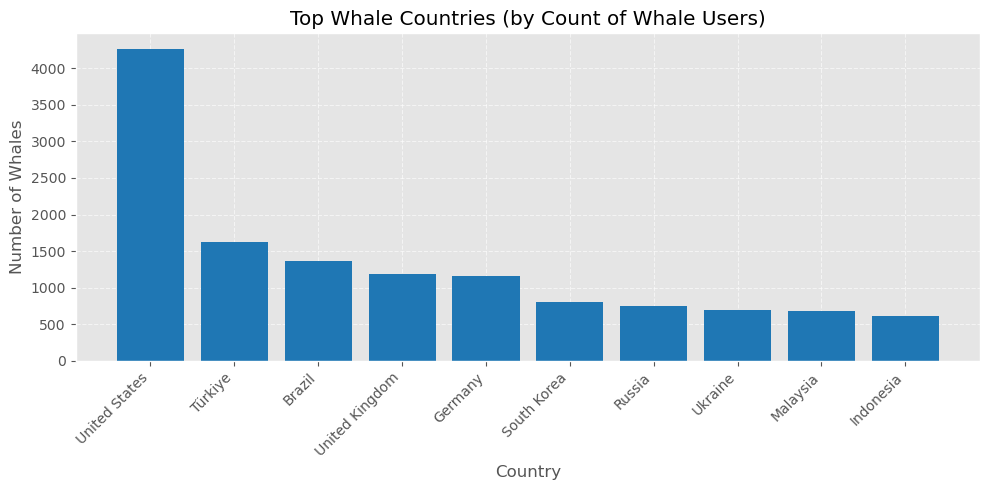

In [87]:
plt.figure(figsize=(10,5))
plt.bar(whale_country.index, whale_country.values, color="#1f77b4")
plt.title("Top Whale Countries (by Count of Whale Users)")
plt.xlabel("Country")
plt.ylabel("Number of Whales")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("assets/task2_top_whale_countries.png", dpi=300, bbox_inches='tight')
plt.show()


### Hızlı İçgörüler

- **ABD whale tabanına açık ara liderlik ediyor**  
  United States, whale sayısında diğer ülkelere göre belirgin bir farkla önde.  
  → Yüksek değerli oyuncular açısından, mutlak hacimde en kritik pazar konumunda.

- **Türkiye, Brezilya ve Güneydoğu Asya güçlü “yükselen whale” pazarları**  
  Türkiye, Brezilya, Malezya ve Endonezya’nın ilk 10’da yer alması:
  - **fiyat hassas ama yüksek engagement** gösteren bölgelerde iyi çekiş olduğunu,
  - **bölgesel fiyatlandırma, yerelleştirilmiş teklifler ve lokal etkinlikler** için güçlü fırsatlar olduğunu gösteriyor.

- **Olgun Batı pazarları hâlâ temel taşı**  
  Birleşik Krallık ve Almanya, Batı Avrupa’da hâlâ önemli gelir katkısı yapan pazarlar;  
  tipik F2P harcama davranışlarıyla uyumlu bir profil çiziyorlar.

- **Yüksek rekabet / core gamer pazarları da öne çıkıyor**  
  Güney Kore ve Rusya, **rekabetçi ve core gamer** kitleleriyle bilinen pazarlar.  
  Bu da, shooter / high-skill bir oyunun whale çekmesinin bu bölgelerde doğal olduğunu destekliyor.

---


- **Live-ops, bölgesel etkinlik ve yerelleştirilmiş teklif önceliği** verilebilecek pazarlar:
  - ABD (ana whale hacmi),
  - Türkiye & Brezilya (hızlı büyüyen, fiyat hassas whale kitlesi),
  - kilit APAC/Doğu Avrupa pazarları (Güney Kore, Malezya, Endonezya).

- **Düşünülebilecek aksiyonlar:**
  - Bölgesel fiyatlandırma (özellikle gelişmekte olan pazarlarda daha düşük giriş paketleri),
  - Yerelleştirilmiş pazarlama ve kreatifler,
  - Bu ana ülkelerin saat dilimlerine uygun zamanlamayla düzenlenen etkinlikler ve turnuvalar.


### Quick Insights

- **US dominates the whale base**  
  The United States has the largest number of whales by a clear margin.  
  → This is likely the single most important market for high-value players in absolute volume.

- **Türkiye, Brazil, and Southeast Asia are very strong emerging whale markets**  
  Türkiye, Brazil, Malaysia, and Indonesia appearing in the top 10 suggests:
  - good traction in **price-sensitive but high-engagement** regions,
  - strong opportunity for **regionalized pricing, localized offers, and local events**.

- **Mature Western markets are still key**  
  United Kingdom and Germany remain core revenue contributors among Western Europe countries,  
  consistent with typical F2P spend patterns.

- **High-competition / core-gamer markets also show up**  
  South Korea and Russia are both known for **competitive / core gaming audiences**,  
  which fits well with a shooter / high-skill game attracting whales there.

---

- **Prioritize live-ops, regional events, and localized offers** for:
  - US (core whale volume),
  - Türkiye & Brazil (fast-growing, price-sensitive whales),
  - key APAC/EE markets (South Korea, Malaysia, Indonesia).

- **Consider:**
  - regional pricing (e.g., lower entry packs in emerging markets),
  - localized marketing / creatives,
  - time-zone-aligned events for these top whale countries.


In [90]:
# 1) Zero-error users = low_error
user.loc[user["error_rate"] == 0, "error_bucket"] = "low_error"

# 2) Non-zero users için qcut
mask = user["error_rate"] > 0

user.loc[mask, "error_bucket"] = pd.qcut(
    user.loc[mask, "error_rate"],
    q=[0, 0.8, 0.95, 1.0],  
    labels=["mid_error", "high_error", "extreme_error"]
)


In [91]:
error_rev = user.groupby("error_bucket").agg(
    avg_iap=("total_iap", "mean"),
    avg_ads=("total_ads", "mean"),
    avg_revenue=("total_revenue", "mean")
)
error_rev


,avg_iap,avg_ads,avg_revenue
error_bucket,,,
extreme_error,0.000789,0.002703,0.003492
high_error,0.170648,0.026442,0.197090
low_error,0.158434,0.043058,0.201492
mid_error,7.622542,0.606042,8.228584


In [92]:
error_eng = user.groupby("error_bucket").agg(
    users=("user_id", "count"),
    days_played=("days_played", "mean"),
    sessions_per_day=("sessions_per_day", "mean"),
    play_intensity=("play_intensity", "mean"),
    matches_per_session=("matches_per_session", "mean"),
    win_rate=("win_rate", "mean"),
    completion_rate=("completion_rate", "mean"),
)
error_eng


,users,days_played,sessions_per_day,play_intensity,matches_per_session,win_rate,completion_rate
error_bucket,,,,,,,
extreme_error,4490,1.972383,1.343782,438.803631,1.585291,0.241181,0.338724
high_error,13682,2.333212,1.375941,585.361591,2.020242,0.400180,0.519390
low_error,2362257,2.589824,1.290279,793.647725,1.801022,0.471338,0.641219
mid_error,73070,15.522964,2.497374,3899.508258,3.652154,0.618065,0.823817


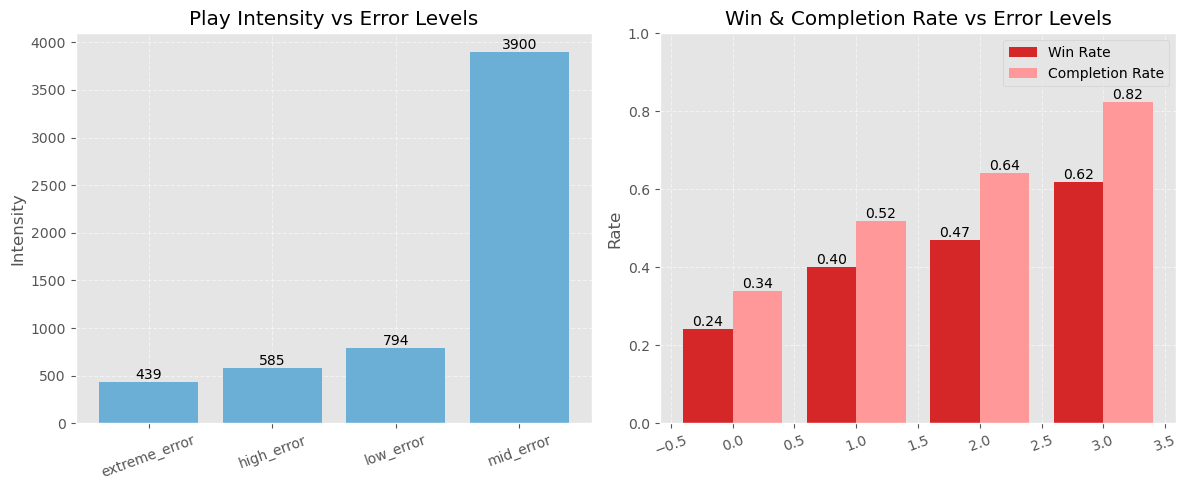

In [93]:
plt.style.use("ggplot")

soft_blue = "#6baed6"
red_loss = "#d62728"

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# LEFT — Engagement (play intensity & sessions_per_day)
axes[0].bar(error_eng.index, error_eng["play_intensity"], color=soft_blue)
for i, v in enumerate(error_eng["play_intensity"]):
    axes[0].text(i, v, f"{v:.0f}", ha="center", va="bottom")
axes[0].set_title("Play Intensity vs Error Levels")
axes[0].set_ylabel("Intensity")
axes[0].tick_params(axis='x', rotation=20)
axes[0].grid(True, linestyle='--', alpha=0.5)

# RIGHT — Quality (win_rate & completion_rate)
x = range(len(error_eng.index))
bar_width = 0.4

axes[1].bar([i - bar_width/2 for i in x], error_eng["win_rate"], 
            width=bar_width, label="Win Rate", color=red_loss)
axes[1].bar([i + bar_width/2 for i in x], error_eng["completion_rate"], 
            width=bar_width, label="Completion Rate", color="#ff9999")

for i, v in enumerate(error_eng["win_rate"]):
    axes[1].text(i - bar_width/2, v, f"{v:.2f}", ha="center", va="bottom")

for i, v in enumerate(error_eng["completion_rate"]):
    axes[1].text(i + bar_width/2, v, f"{v:.2f}", ha="center", va="bottom")

axes[1].set_title("Win & Completion Rate vs Error Levels")
axes[1].set_ylabel("Rate")
axes[1].set_ylim(0,1)
axes[1].tick_params(axis='x', rotation=20)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("assets/task2_error_levels_by_2.png", dpi=300, bbox_inches='tight')
plt.show()


### Ana İçgörüler – Hata Seviyeleri, Davranış ve Gelir

**1) Oynanış tarafı (engagement & performans)**

- **mid_error = heavy / core oyuncular**  
  - En yüksek **days_played (~15.5)**, **sessions_per_day (~2.5)** ve **play_intensity (~3900 sn/gün)** bu segmentte.  
  - Maç başına 3.65 maç, **win_rate (~0.62)** ve **completion_rate (0.82)** ile hem çok oynayan hem de iyi oynayan bir kitle.  
  → Biraz hata görmelerine rağmen oyunda kalan ve yüksek performans gösteren **heavy/core oyuncular** burada.

- **low_error = büyük “normal” kitle**  
  - Kullanıcıların ezici çoğunluğu (2.36M) bu segmentte.  
  - days_played ≈ 2.6, sessions_per_day ≈ 1.3, play_intensity ≈ 794 sn → **orta seviye engagement**.  
  - Win ve completion oranları dengeli (0.47 / 0.64).  
  → Az hata gören, orta düzey oynayan “tipik F2P oyuncu” profili.

- **high_error = biraz daha kırılgan segment**  
  - Engagement low_error’a yakın ama **win_rate (0.40)** ve **completion_rate (0.52)** daha düşük.  
  → Hem daha çok hata görüyorlar hem de performansları düşük; hata + düşük skill birleşince churn riski burada daha yüksek olabilir.

- **extreme_error = en riskli grup**  
  - Gün sayısı düşük (2), intensity düşük (~440 sn/gün), win_rate (0.24) ve completion_rate (0.34) çok zayıf.  
  → Oyuna çok az şans verip hem **çok hata** gören hem de **sürekli kaybeden/maçları bitiremeyen** bir kitle.

---

**2) Gelir tarafı (avg_revenue’ye göre)**

- **En yüksek gelir “mid_error” segmentinden geliyor**  
  - Kullanıcı başına ortalama gelir **~8.23** ile diğer tüm segmentlerin çok üzerinde.  
  - Bu segmentin büyük ihtimalle **heavy / whale oyunculardan** oluştuğunu; çok oynadıkları için daha fazla hata görmelerinin normal olduğunu gösteriyor (hata oranı “sıfır” değil ama “aşırı” da değil).

- **“low_error” ve “high_error” segmentleri benzer ve düşük monetizasyon üretiyor**  
  - Her iki segmentte de kullanıcı başına gelir **~0.2** civarında.  
  → Daha çok **low/mid spender** veya F2P ağırlıklı oyuncular.

- **“extreme_error” segmentinde neredeyse hiç gelir yok**  
  - Kullanıcı başına gelir neredeyse **0**.  
  → Çok yüksek hata oranına maruz kalan oyuncular ya oyunda kalmıyor (churn) ya da kalsa bile para harcamıyor.

---

**3) Önemli not (sebep–sonuç ilişkisi)**

- Muhtemel ilişki şöyle:
  - Çok oynayan ve çok harcayan kullanıcılar → daha fazla süre ve maç → **daha fazla hata ile karşılaşma ihtimali**.  
- Öte yandan “extreme_error” grubunda neredeyse sıfır gelir olması şunu net gösteriyor:
  - **Aşırı ve sürekli hatalar**, özellikle early/mid game’de, monetizasyonu tamamen öldürebiliyor.

---

**4) Ürün açısından çıkarım**

- **Değer koruma:**  
  - Gelirin ve engagement’ın büyük kısmı **mid_error segmentindeki heavy oyunculardan** geliyor.  
  - Bu kitle için hatalar “tolere edilebilir” seviyede kalsa da, uzun vadede bu seviyeyi aşağı çekmek (daha stabil deneyim) önemli.

- **Kritik teknik öncelik:**  
  - **extreme_error** segmentinde yaşanan ağır problemleri azaltmak.  
  - “İlk birkaç gününde zaten az oynayan, üstüne bir de sürekli hata gören” oyuncular hem engagement hem potansiyel gelir tarafında tamamen kaybediliyor.

- **Strateji:**  
  - Heavy kullanıcıların yoğun olduğu bölgelerde/cihazlarda stabiliteyi iyileştirmek,  
  - “extreme_error” örneği görülen cihaz / ülke / ağ segmentlerini tespit edip hedefli teknik iyileştirme yapmak,  
  - Böylece hem churn’ü düşürmek hem de ileride whale olabilecek oyuncuların kaybını azaltmak.


### Key Insights – Error Levels, Behaviour and Revenue

**1) Gameplay side (engagement & performance)**

- **mid_error = heavy / core players**  
  - Highest **days_played (~15.5)**, **sessions_per_day (~2.5)** and **play_intensity (~3900 sec/day)**.  
  - Around **3.65 matches per session**, with **win_rate (~0.62)** and **completion_rate (~0.82)**.  
  → These are clearly **heavy/core players**: they play a lot and perform well, even though they do see some errors.

- **low_error = large “normal” population**  
  - The vast majority of users (2.36M) are here.  
  - days_played ≈ 2.6, sessions_per_day ≈ 1.3, play_intensity ≈ 794 sec → **medium engagement**.  
  - Win and completion rates are balanced (0.47 / 0.64).  
  → This is the “typical F2P player”: low error exposure, moderate play.

- **high_error = more fragile segment**  
  - Engagement is similar to low_error, but **win_rate (0.40)** and **completion_rate (0.52)** are clearly lower.  
  → They see more errors *and* have weaker performance; the combination of frustration + low skill likely increases churn risk here.

- **extreme_error = highest-risk group**  
  - Low days_played (~2), low play_intensity (~440 sec/day), very low **win_rate (0.24)** and **completion_rate (0.34)**.  
  → Players who give the game a short try, experience **a lot of errors**, often lose and don’t finish matches.  
  → From both engagement and monetization perspectives, they are almost “lost” users.

---

**2) Revenue side (avg_revenue per user)**

- **Highest revenue comes from the “mid_error” segment**  
  - Average revenue per user is **~8.23**, far above all other buckets.  
  - This strongly suggests that this bucket is dominated by **heavy / whale players**: they play many matches, so they naturally accumulate some errors, but at a **non-extreme** level.

- **“low_error” and “high_error” are similar and low-value**  
  - Both are around **~0.2 revenue per user**.  
  → These are mostly **low/mid spenders** or F2P players with limited monetization.

- **“extreme_error” has almost no revenue**  
  - Per-user revenue is essentially **zero**.  
  → Players exposed to very high error rates either churn quickly or stay but **never spend**.

---

**3) Important note (correlation vs causation)**

- This analysis does **not** say that “more errors cause more revenue”.  
- The more plausible relationship is:
  - Heavy, high-spending players → more time and more matches → **higher probability of encountering errors**.  
- At the same time, the fact that the “extreme_error” bucket has almost no revenue clearly shows:
  - **Severe, persistent errors – especially early/mid game – are lethal for monetization.**

---

**4) Product implications**

- **Protect value:**  
  - A large share of revenue and engagement comes from **mid_error heavy players**.  
  - Their error rate is “tolerable”, but over time we still want to reduce it and provide a more stable experience for this high-value segment.

- **Fix the critical pain point:**  
  - The top technical priority should be reducing issues for the **extreme_error** segment.  
  - Players who see lots of errors in their first few sessions are effectively lost from both retention and revenue perspectives.

- **Strategy:**  
  - Improve stability in regions/devices where heavy users are concentrated,  
  - Identify device / country / network combinations that are over-represented in the **extreme_error** bucket and target them with focused technical fixes,  
  - Reduce churn and keep more potential future whales in the ecosystem by ensuring the experience is reliable enough for them to stay and eventually spend.


In [96]:
# 0) user_id tiplerini eşitle
df["user_id"] = df["user_id"].astype(str)
user["user_id"] = user["user_id"].astype(str)

df_unique = df[["user_id", "platform", "country"]].drop_duplicates("user_id")

user = user.merge(df_unique, on="user_id", how="left")

user["platform"] = user["platform"].fillna("Unknown")
user["country"] = user["country"].fillna("Unknown")

print([c for c in user.columns if "platform" in c or "country" in c])


['platform', 'country']


In [97]:
platform_country_summary = user.groupby(["platform", "country"]).agg(
    users=("user_id", "count"),
    avg_days_played=("days_played", "mean"),
    avg_sessions_per_day=("sessions_per_day", "mean"),
    avg_play_intensity=("play_intensity", "mean"),
    avg_iap=("total_iap", "mean"),
    avg_ads=("total_ads", "mean"),
    avg_revenue=("total_revenue", "mean"),
    payer_rate=("total_iap", lambda x: (x > 0).mean()),
    error_rate=("error_rate", "mean")
).reset_index()

platform_country_summary

,platform,country,users,avg_days_played,avg_sessions_per_day,avg_play_intensity,avg_iap,avg_ads,avg_revenue,payer_rate,error_rate
0,android,Afghanistan,102,2.392157,1.386878,746.517204,0.000000,0.005205,0.005205,0.000000,0.000355
1,android,Albania,2468,2.822934,1.365285,1020.225081,0.070351,0.017306,0.087656,0.004052,0.020386
2,android,Algeria,5499,2.508274,1.349211,848.637961,0.055242,0.008824,0.064066,0.001273,0.006124
3,android,American Samoa,9,2.111111,1.185185,323.768685,0.000000,0.000678,0.000678,0.000000,0.000000
4,android,Andorra,11,1.545455,1.000000,595.375882,0.000000,0.007531,0.007531,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
445,ios,Western Sahara,9,1.666667,1.022222,253.184200,0.000000,0.004173,0.004173,0.000000,0.000000
446,ios,Yemen,104,3.230769,1.431142,1105.192936,0.065551,0.021130,0.086681,0.019231,0.017956
447,ios,Zambia,16,4.062500,1.603165,1198.161762,0.000000,0.018486,0.018486,0.000000,0.018637
448,ios,Zimbabwe,24,1.958333,1.330556,1328.572333,0.041250,0.045652,0.086902,0.041667,0.000000


In [98]:
country_summary = (
    user.groupby("country").agg(
        users=("user_id", "count"),
        avg_days_played=("days_played", "mean"),
        avg_revenue=("total_revenue", "mean"),
        payer_rate=("total_iap", lambda x: (x > 0).mean() * 100),   
        error_rate=("error_rate", lambda x: x.mean() * 100)    
    )
    .round({"avg_days_played": 2, "avg_revenue": 2, "payer_rate": 2, "error_rate": 2})
    .sort_values("users", ascending=False)
    .head(20)
)
country_summary.head()

,users,avg_days_played,avg_revenue,payer_rate,error_rate
country,,,,,
Brazil,225367,2.70,0.19,1.22,1.44
Türkiye,197153,3.37,0.36,1.93,0.55
Russia,181041,2.87,0.10,0.19,2.15
United States,176497,2.91,1.13,2.69,0.86
Vietnam,115575,2.64,0.20,0.91,0.42


#### Türkçe Kısa Yorum

- **United States**  
  - Görece düşük kullanıcı sayısına rağmen en yüksek **ARPU (1.13)** ve en yüksek **payer rate (2.69%)** ile en değerli pazarların başında geliyor.  
  - Error rate %0.86 ile makul seviyede; bu pazarda monetizasyon güçlü, teknik risk ise orta düzeyde.

- **Türkiye**  
  - **Avg_days_played (3.37)** ile listedeki en yüksek engagement’a sahip ülke.  
  - ARPU (0.36) ve payer rate (1.93%) de oldukça iyi; oyuncu başına gelir Brezilya/Vietnam’dan belirgin şekilde yüksek.  
  - Error rate sadece **%0.55** → hem iyi monetizasyon hem de görece stabil deneyim → **yüksek potansiyelli stratejik pazar**.

- **Brazil**  
  - En büyük kullanıcı tabanı (225K) ama ARPU (0.19) ve payer rate (1.22%) orta seviyede.  
  - Error rate %1.44 ile diğer ana pazarlara göre daha yüksek; teknik iyileştirme yapılırsa hem retention hem monetizasyon artışı beklenebilir.

- **Vietnam**  
  - User base daha küçük ama ARPU (0.20) ve düşük error rate (%0.42) ile **verimli ve stabil** bir pazar.  
  - Payer rate (0.91%) orta seviyede; conversion artırmaya yönelik lokal teklifler için iyi aday.

- **Russia**  
  - Kullanıcı sayısı yüksek, ancak **ARPU (0.10)** ve **payer rate (0.19%)** çok düşük.  
  - Error rate **%2.15** ile tablodaki en yüksek değer; düşük monetizasyon + yüksek hata kombinasyonu, bu pazarda hem teknik hem ürün tarafında ciddi bir bariyer olduğunu gösteriyor.

**Özet:**  
- **US ve Türkiye**, hem engagement hem monetizasyon tarafında en öne çıkan pazarlar.  
- **Brazil ve Vietnam**, geniş/iyi kullanıcı tabanı olup daha fazla monetizasyon potansiyeli taşıyan, özellikle lokal fiyatlandırma ve tekliflerle büyütülebilecek pazarlar.  
- **Russia**, yüksek hata oranı ve düşük monetizasyon ile “önce stabilite ve deneyim, sonra monetizasyon” yaklaşımının en çok gerektiği ülke gibi görünüyor.


#### Short English Summary

- **United States** – Highest **ARPU (1.13)** and **payer rate (2.69%)** → very strong monetization, with a moderate error rate (~0.86%).  
- **Türkiye** – Highest **avg_days_played (3.37)** and solid ARPU (0.36) + payer rate (1.93%), with low error (~0.55%). A high-potential, **high-engagement & relatively stable** market.  
- **Brazil** – Largest user base, mid-level ARPU and payer rate, but relatively high error rate (1.44%). Good target for **stability + monetization** improvements.  
- **Vietnam** – Smaller base but decent ARPU and the lowest error rate (0.42%), a **healthy and efficient** market that could benefit from better conversion.  
- **Russia** – High user count but very low ARPU and payer rate, and the highest error rate (2.15%). Strong signal that **technical and experience issues** are blocking monetization.


In [101]:
df_unique_platform = df[["user_id", "platform"]].drop_duplicates()

df_unique_platform["user_id"] = df_unique_platform["user_id"].astype(str)

merged_platform = top1.merge(df_unique_platform, on="user_id", how="left")

if "platform_y" in merged_platform.columns:
    merged_platform = merged_platform.rename(columns={"platform_y": "platform"})
elif "platform_x" in merged_platform.columns:
    merged_platform = merged_platform.rename(columns={"platform_x": "platform"})

whale_platform_rate = (
    merged_platform.groupby("platform")["user_id"]
                   .count()
                   .div(user.groupby("platform")["user_id"].count())
)

whale_platform_rate_percent = (whale_platform_rate * 100).round(2).astype(str)
print(whale_platform_rate_percent)

platform_error_pct = (
    user.groupby("platform")["error_rate"]
        .mean()
        .mul(100)
        .round(2)
)

print(platform_error_pct)



platform
android    0.74
ios        1.58
Name: user_id, dtype: object
platform
android    1.46
ios        0.76
Name: error_rate, dtype: float64


### Platform Bazında Whale Oranı ve Error Rate – Yorum

**1) Whale oranı (top1 içinde olma ihtimali)**  
- **iOS: %1.58**  
- **Android: %0.74**  

→ iOS’ta oyuncuların **oran olarak** neredeyse **2 katı** whale.  
Yani kullanıcı başına bakınca, iOS kitlesi **daha yüksek değerli** (whale yoğunluğu daha fazla).

**2) Error rate**  
- **Android: %1.46**  
- **iOS: %0.76**  

→ Android tarafında hata oranı **iOS’un neredeyse 2 katı**.  
Bu da Android’de:
- daha fazla teknik sorun,
- daha kötü bağlantı / cihaz çeşitliliği,
- veya belli cihaz gruplarında stabilite problemi olabileceğine işaret ediyor.

**3) Birlikte okuduğumuzda**

- **iOS**  
  - Daha temiz/stabil deneyim (düşük error rate),  
  - Daha yüksek whale oranı → kullanıcı başına gelir potansiyeli yüksek, “premium” segment gibi davranıyor.

- **Android**  
  - Daha yüksek hata oranı,  
  - Daha düşük whale oranı.  

In [103]:
country_error = (
    user.groupby("country")
        .agg(
            users=("user_id", "count"),
            avg_error_rate=("error_rate", "mean"),
            total_revenue=("total_revenue", "sum")
        )
        .reset_index()
)

country_error = country_error[country_error["users"] >= 20_000].copy()

country_error["avg_error_rate"] = (country_error["avg_error_rate"] * 100).round(2)

total_rev_global = country_error["total_revenue"].sum()
country_error["revenue_share_pct"] = (
    country_error["total_revenue"] / total_rev_global * 100
).round(2)

country_error_sorted = country_error.sort_values(
    ["avg_error_rate", "revenue_share_pct", "users"],
    ascending=[False, False, False]
).reset_index(drop=True)

country_error_sorted.head()


,country,users,avg_error_rate,total_revenue,revenue_share_pct
0,Kazakhstan,55021,8.43,6494.820581,0.91
1,Ukraine,81744,2.64,23276.336632,3.27
2,Mexico,39503,2.53,5554.745265,0.78
3,Russia,181041,2.15,18138.612536,2.55
4,Brazil,225367,1.44,42963.924061,6.04


- **Kazakhstan – En yüksek hata oranı, düşük gelir payı**
  - Avg error rate **%8.43** ile tablonun açık ara en yüksek değeri.
  - Revenue share sadece **%0.91** olsa da 55K kullanıcı az değil.
  - Yorum: Muhtemelen ciddi stabilite/bağlantı problemi var; oyuncular hatalar yüzünden monetize olamadan oyundan düşüyor.  
    → “Şu an değersiz görünen ama hatalar düzeltilirse büyüme potansiyeli olan” pazar.

- **Ukraine – Orta-yüksek hata, anlamlı gelir**
  - Error **%2.64**, revenue share **%3.27**.
  - Yorum: Hem gelir anlamlı, hem hata oranı yüksek → burada yapılacak teknik iyileştirme, **geliri korumak ve büyütmek** açısından yüksek ROI sağlar.

- **Mexico – Yüksek hata, düşük gelir**
  - Error **%2.53**, revenue share **%0.78**.
  - Yorum: Stabilite tarafında sorun var, ama şu an gelir katkısı sınırlı.  
    → Büyüme hedefleniyorsa, retention + stabilite iyileştirmeleriyle orta vadeli yatırım alanı olabilir.

- **Russia – Yüksek kullanıcı sayısı, orta hata, orta gelir**
  - 181K kullanıcı ile büyük pazar; error **%2.15**, revenue share **%2.55**.
  - Yorum: Hem anlamlı bir kullanıcı/gelir hacmi var, hem de hata oranı yüksek.  
    → “Hem risk hem fırsat” pazar; teknik iyileştirme yapıldığında etkisi hissedilir.

- **Brazil – En büyük pazar, orta seviye hata**
  - En yüksek kullanıcı sayısı (**225K**) ve en yüksek revenue share (**%6.04**).
  - Error **%1.44** ile listede en düşük ama hâlâ sıfır değil.
  - Yorum: Zaten çok kazandıran ana pazar; burada hata oranını biraz daha düşürmek, özellikle high-value oyuncularda LTV’yi artırmak için iyi bir kaldıraç.

**Genel içgörü:**

- **Brazil, Ukraine ve Russia**, hem kayda değer gelir payına hem de sıfır olmayan (bazı durumlarda yüksek) hata oranlarına sahip.
  - → Bu ülkeler, **stabilite iyileştirmesi yapıldığında en net finansal etkiyi** görebileceğimiz pazarlar.
- **Kazakhstan ve Mexico** ise yüksek hata oranına sahip olup görece düşük gelir üretiyor:
  - Şu an için ikincil öncelik gibi görünseler de, hataların azaltılması bu pazarları gelecekte daha anlamlı hale getirebilir.


- **Kazakhstan – Extremely high error, low revenue share**
  - Avg error rate is **8.43%**, by far the highest in this set.
  - Revenue share is only **0.91%**, but a base of 55K users is not negligible.
  - Interpretation: there are likely serious stability/connectivity issues; players may be churning or never monetizing because of errors.  
    → This looks like a *blocked market* that could unlock upside if the experience is fixed.

- **Ukraine – Mid-high error, meaningful revenue**
  - Error rate **2.64%**, revenue share **3.27%**.
  - Interpretation: this country already contributes a non-trivial share of revenue, but players are exposed to above-average error.  
    → Good candidate for **stability improvements with clear revenue-protection upside**.

- **Mexico – High error, low revenue**
  - Error rate **2.53%**, revenue share **0.78%**.
  - Interpretation: technically problematic, but currently a small revenue contributor.  
    → More of a **growth market**: if retention and stability improve, there is room to scale monetization over time.

- **Russia – Large user base, elevated error, moderate revenue**
  - 181K users, error rate **2.15%**, revenue share **2.55%**.
  - Interpretation: sizeable audience and noticeable revenue, but error is clearly higher than ideal.  
    → A “medium-size but important” market where technical fixes are likely to have visible impact.

- **Brazil – Largest market, moderate error**
  - Largest user base (**225K**) and the highest revenue share (**6.04%**).
  - Error rate **1.44%** is the lowest in this subset but still not zero.
  - Interpretation: this is already a **core revenue market**; reducing error further, especially for heavy users, is a strong lever to boost LTV.

**Overall takeaway:**

- **Brazil, Ukraine and Russia** combine **meaningful revenue share** with **non-trivial error rates** → they are prime candidates for stability work with high ROI.
- **Kazakhstan and Mexico** show **high error but relatively low revenue**:
  - Right now they look under-monetized,
  - But the high error suggests that technical issues may be a primary blocker rather than lack of demand.

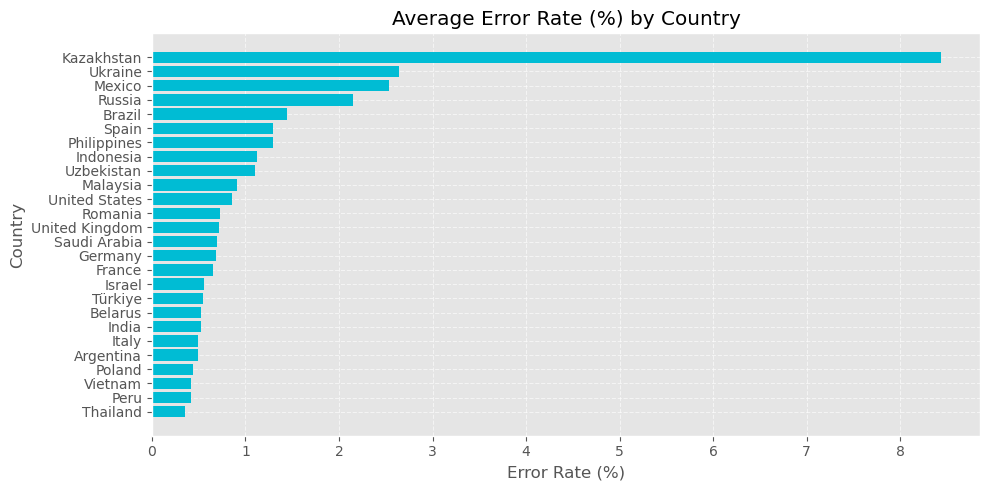

In [106]:
plt.figure(figsize=(10,5))
plt.barh(country_error_sorted["country"], country_error_sorted["avg_error_rate"], color="#00bcd4")
plt.title("Average Error Rate (%) by Country")
plt.xlabel("Error Rate (%)")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("assets/task2_average_error_rate.png", dpi=300, bbox_inches='tight')
plt.show()


In [107]:
err_med = country_error_sorted["avg_error_rate"].median()
rev_med = country_error_sorted["revenue_share_pct"].median()

def classify_country(row):
    e = row["avg_error_rate"]
    r = row["revenue_share_pct"]
    
    if e >= err_med and r < rev_med:
        return "High Error / Low Revenue"
    elif e >= err_med and r >= rev_med:
        return "High Error / High Revenue"
    elif e < err_med and r >= rev_med:
        return "Low Error / High Revenue"
    else:
        return "Low Error / Low Revenue"

country_error_sorted["risk_segment"] = country_error_sorted.apply(classify_country, axis=1)
country_error_sorted.head()


,country,users,avg_error_rate,total_revenue,revenue_share_pct,risk_segment
0,Kazakhstan,55021,8.43,6494.820581,0.91,High Error / Low Revenue
1,Ukraine,81744,2.64,23276.336632,3.27,High Error / High Revenue
2,Mexico,39503,2.53,5554.745265,0.78,High Error / Low Revenue
3,Russia,181041,2.15,18138.612536,2.55,High Error / High Revenue
4,Brazil,225367,1.44,42963.924061,6.04,High Error / High Revenue


In [108]:
country_error_sorted.groupby("risk_segment")["country"].count()
country_error_sorted[country_error_sorted["risk_segment"]=="High Error / Low Revenue"][["country","avg_error_rate","revenue_share_pct","users"]]
country_error_sorted[country_error_sorted["risk_segment"]=="High Error / High Revenue"][["country","avg_error_rate","revenue_share_pct","users"]]
country_error_sorted[country_error_sorted["risk_segment"]=="Low Error / High Revenue"][["country","avg_error_rate","revenue_share_pct","users"]]
country_error_sorted[country_error_sorted["risk_segment"]=="Low Error / Low Revenue"][["country","avg_error_rate","revenue_share_pct","users"]]


,country,avg_error_rate,revenue_share_pct,users
13,Saudi Arabia,0.70,1.83,29593
16,Israel,0.56,1.78,22660
18,Belarus,0.53,0.23,23044
19,India,0.52,2.39,109813
20,Italy,0.49,2.19,27663
21,Argentina,0.49,0.39,58193
24,Peru,0.42,0.69,28857


In [109]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


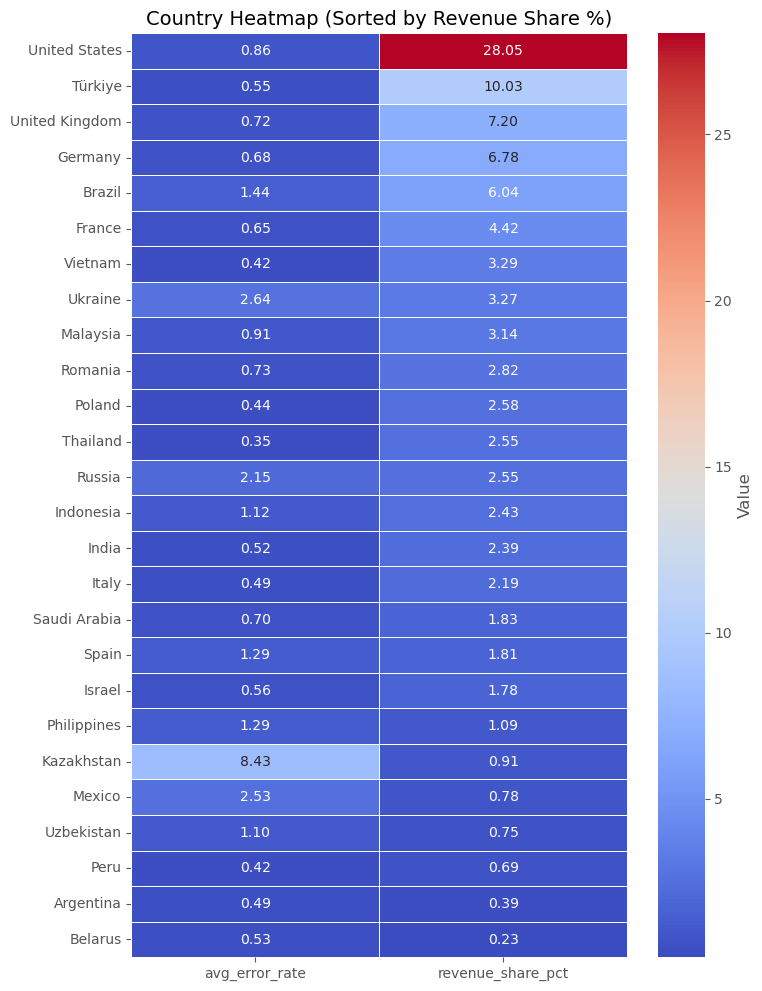

In [110]:

heat = (
    country_error_sorted
    .sort_values("revenue_share_pct", ascending=False)
    .set_index("country")[["avg_error_rate", "revenue_share_pct"]]
)

plt.figure(figsize=(8, 12))
sns.heatmap(
    heat,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Value'}
)
plt.title("Country Heatmap (Sorted by Revenue Share %)", fontsize=14)
plt.ylabel("")
plt.xlabel("")
plt.savefig("assets/task2_revenue_share_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


In [111]:
import geopandas as gpd
from pathlib import Path

# Mac Downloads altındaki klasör
shp_path = (
    Path.home()
    / "Downloads"
    / "ne_110m_admin_0_countries"
    / "ne_110m_admin_0_countries.shp"
)

print(shp_path)  # kontrol için
world = gpd.read_file(shp_path)

world.head()


/Users/macbookair/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [112]:
country_error_sorted["country"] = country_error_sorted["country"].str.strip()

# İlk deneme: 'NAME' ile merge
world_merged = world.merge(
    country_error_sorted,
    left_on="NAME",      
    right_on="country",
    how="left"
)

world_merged[["NAME", "country", "avg_error_rate", "revenue_share_pct"]].head()
print(world.columns)


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [113]:
# threshold's
error_med = country_error_sorted["avg_error_rate"].median()
rev_med = country_error_sorted["revenue_share_pct"].median()

def risk_segment(row):
    if row["avg_error_rate"] > error_med and row["revenue_share_pct"] > rev_med:
        return "High Error / High Revenue"
    elif row["avg_error_rate"] > error_med and row["revenue_share_pct"] <= rev_med:
        return "High Error / Low Revenue"
    elif row["avg_error_rate"] <= error_med and row["revenue_share_pct"] > rev_med:
        return "Low Error / High Revenue"
    else:
        return "Low Error / Low Revenue"

country_error_sorted["risk_segment"] = country_error_sorted.apply(risk_segment, axis=1)


In [114]:
risk_colors = {
    "High Error / High Revenue": "#e53935",   # kırmızı
    "High Error / Low Revenue":  "#fb8c00",   # turuncu
    "Low Error / High Revenue":  "#43a047",   # yeşil
    "Low Error / Low Revenue":   "#1e88e5",   # mavi
}

country_error_sorted["risk_color"] = country_error_sorted["risk_segment"].map(risk_colors)


In [115]:
world_merged = world.merge(
    country_error_sorted,
    left_on="NAME",
    right_on="country",
    how="left"
)
world_merged[["NAME", "risk_segment", "risk_color"]].head(20)


,NAME,risk_segment,risk_color
0,Fiji,NaN,NaN
1,Tanzania,NaN,NaN
2,W. Sahara,NaN,NaN
3,Canada,NaN,NaN
4,United States of America,NaN,NaN
5,Kazakhstan,High Error / Low Revenue,#fb8c00
6,Uzbekistan,High Error / Low Revenue,#fb8c00
7,Papua New Guinea,NaN,NaN
8,Indonesia,High Error / Low Revenue,#fb8c00
9,Argentina,Low Error / Low Revenue,#1e88e5


In [116]:
import folium
m = folium.Map(location=[20, 0], zoom_start=2)

for _, row in world_merged.iterrows():
    # risk_color NaN ise atla
    if pd.isna(row.get("risk_color", None)):
        continue
    
    folium.CircleMarker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        radius=5,
        popup=f"{row['NAME']} — {row['risk_segment']}",
        color=row['risk_color'],
        fill=True,
        fill_color=row['risk_color'],
        fill_opacity=0.9,
    ).add_to(m)

m 

### Görselleştirmelerin Özeti ve Yorum

Bu üç grafik aslında aynı hikâyeyi üç farklı açıdan anlatıyor:

---

#### 1. Heatmap – Error Rate vs Revenue Share (Country)

- Soldaki kolon: **avg_error_rate_pct**  
- Sağdaki kolon: **revenue_share_pct**  
- Renk skalası → değerin büyüklüğünü gösteriyor.

Buradan gördüğümüz:

- **Türkiye, Birleşik Krallık, Almanya, Brezilya, Fransa** gibi ülkeler:
  - **düşük–orta error** seviyesine sahip,
  - ama **yüksek revenue share** üretiyor.  
  → Bunlar, hem stabil hem de gelir açısından **çekirdek pazar** konumunda.

- **Ukrayna, Rusya, Malezya vb.** ülkeler:
  - revenue share fena değil,
  - ama error rate daha yüksek.  
  → “Gelir getiriyor ama riskli” pazarlar → teknik yatırım yapılırsa doğrudan gelir korunur / artar.

---

#### 2. Dünya Haritası – Error & Revenue Risk Segments

Haritada ülkeleri, error ve gelir kombinasyonuna göre sınıflandırıyor (renkler segmentleri temsil ediyor):

- **Kırmızı / turuncu tonlar** → hem **yüksek revenue** hem de **yüksek error** (yüksek risk, yüksek ROI).
- **Mavi / yeşil tonlar** → daha stabil ama geliri görece düşük pazarlar.
- **Gri** → ya çok az kullanıcı ya da veri yok.

Bu harita, decision-maker için tek bakışta şunu gösteriyor:

> “Hangi coğrafyalarda hem para kazanıyoruz hem de hata yüzünden oyuncu kaybetme riskimiz var?”

---

#### 3. Yatay Bar Grafik – Average Error Rate (%) by Country

Bu grafik, ülkeleri **sadece error oranına göre** sıralıyor:

- **Kazakhstan** açık ara en yüksek error oranına sahip (~%8+) → teknik olarak en problemli ülke.
- Sonrasında **Ukraine, Mexico, Russia, Brazil** gibi ülkeler geliyor:
  - Bunlar heatmap ve revenue tablosuyla birlikte düşünülünce:
    - Hem **kayda değer kullanıcı / gelir** üretiyorlar,
    - Hem de **ortalamanın üzerinde hata** yaşıyorlar.

Bu bar chart, “nerede teknik yangın var?” sorusunun direkt cevabı.

---

### Genel İçgörü

- **Core pazarlar (Türkiye, US, UK, Almanya, Brezilya...)**  
  - Gelir ve kullanıcı hacmi yüksek,  
  - Error oranları makul ama sıfır değil.  
  → Burada yapılacak küçük stabilite iyileştirmeleri bile **yüksek LTV segmentlerini** korumak için önemli.

- **Yüksek riskli pazarlar (Kazakhstan, Ukraine, Mexico, Russia vb.)**  
  - Error oranı belirgin şekilde yüksek,  
  - Bazılarında (özellikle Ukraine, Russia, Brazil) revenue share de anlamlı.  
  → Bu ülkeler, “hem hata çok, hem gelir var” → teknik yatırımın **en yüksek ROI** getireceği yerler.

# Overall Summary & Product Recommendations

Bu notebook’un tamamına baktığımızda, elimizde aslında oldukça net bir hikâye var:

- Çok geniş ama **çoğu “hafif” olan** bir oyuncu tabanı,  
- Onun içinde davranış ve gelir açısından çok net ayrışan **yüksek değerli çekirdek segmentler**,  
- Monetizasyonu omuzlayan küçük bir **whale / VIP** kitlesi,  
- Ve özellikle bazı **ülke & platform kombinasyonlarında** belirginleşen **stabilite / hata problemleri**.

Aşağıda, çalışmanın ana bulgularını ve ürün / teknik tarafta nereye odaklanılması gerektiğini, tek bir çerçeve içinde toparlıyorum.

---

## 1. Kullanıcı & Monetizasyon Fotoğrafı

- Toplam ~2.45M kullanıcıda:
  - **Payer oranı ≈ %1.4**,  
  - **ARPU ≈ 0.44**,  
  - **ARPPU ≈ 30+** (ödeyen oyuncu başına gelir yüksek).
- Gelirin ~%86’sı **IAP**, ~%14’ü **ads** kaynaklı → model net biçimde **IAP-driven**.
- Gelir dağılımı aşırı çarpık:
  - **Top 1% kullanıcı** toplam gelirin çok büyük kısmını taşıyor,
  - Top 1% profilinde:
    - ~19 gün oynama, günde 2.7 oturum,
    - uzun oturumlar, yüksek maç sayısı,
    - yüksek win & completion rate,
    - ve anlamlı IAP harcaması var.

> **Sonuç:** Monetizasyon, geniş bir “low-engagement F2P” tabanının üzerinde duran, görece küçük ama aşırı değerli bir **heavy / whale çekirdeğine** dayanıyor.

---

## 2. Engagement & Oyun Davranışı

User-level metrikler ve türetilmiş özellikler (sessions_per_day, avg_session_duration, match_intensity, matches_per_session, win_rate, completion_rate, play_intensity vb.) bize şunu gösteriyor:

- Çoğu kullanıcı:
  - Sadece **1 gün** oynuyor,
  - O gün **1–2 oturum**, kısa maçlarla oyunu deniyor.
- Buna karşın:
  - Küçük bir segment:
    - **çok gün**,  
    - **çok oturum**,  
    - **yüksek play_intensity** ile oyunu neredeyse günlük rutin haline getiriyor.

Engagement segmentation ve K-Means cluster’lar:

- **Light / Medium** → büyük, düşük değerli F2P kitlesi.
- **Heavy segment + Cluster 0 & 3** →  
  - Daha uzun süre oynayan,
  - Daha fazla maç yapan,
  - Daha yüksek kazanma ve tamamlama oranına sahip,
  - Toplam gelirin çok büyük kısmını üreten core kitle.

> **Sonuç:** Oyuncu tabanı ikiye ayrılıyor:  
> çoğunluk “deneyip geçenler”, azınlık ise “oyunu benimseyip vakit ve para yatıranlar”.

---

## 3. Funnel: Install → Session → Match → Payer

- **Install → Session**: ~%99.9  
  → Neredeyse herkes oyunu indirip en az bir kez açıyor.  
- **Session → Match**: ~%82  
  → Oyunun içini görüp en az bir maç oynayan kitle yüksek, fakat ~%18 maça bile girmeden çıkıyor.  
- **Match → Payer**: ~%1.4  
  → Maça giren geniş kitleden sadece çok küçük bir kısmı payere dönüşüyor.

Bu funnel şunu söylüyor:

- Mağaza / ilk açılış tarafında ciddi bir sorun yok.
- Kritik kırılma noktası:
  - **“İlk maç deneyimi”** ve
  - Oyunu **ilk birkaç gün içinde** “hook”layabilmek.
- Monetizasyon modeli “day 1 paywall” üzerine kurulu değil; daha çok:
  > **“Önce oynat, sonra zaman içinde monetize et”**.

---

## 4. Time to First Payment (TTFP) & Cluster Dinamikleri

Cluster bazlı median TTFP:

- Cluster 0: ~34 gün  
- Cluster 2: ~41 gün  
- Cluster 3: ~66.5 gün  
- Cluster 1: ~207 gün (ve çok az payer)

Yorum:

- **Early paywall yok** → çoğu payer ilk harcamasını **1–2 ay** civarında yapıyor.
- En yüksek değerli cluster (özellikle VIP / whale olan 3. cluster):
  - İlk ödemesini daha **geç** yapıyor,
  - Ama yaptıktan sonra kişi başına gelir çok daha yüksek.

> **Sonuç:** Oyun, doğası gereği **“retention-first, monetization-second”**.  
> Önce oyuncu oyuna bağlanıyor, sonra harcama yapıyor. Bu yüzden **mid/late game deneyimi ve uzun vadeli bağlılık** çok kritik.

---

## 5. Hata Oranları, Error Segmentleri ve Gelir İlişkisi

Error analizi birkaç önemli noktayı ortaya koyuyor:

- Error rate’e göre segmentler (low / mid / high / extreme):
  - **Mid_error segmenti**:
    - En yüksek play_intensity ve gelir üreten heavy oyuncular burada.
    - Bir miktar hata görüyorlar ama deneyim hâlâ “kabul edilebilir”.
  - **Extreme_error segmenti**:
    - Çok yüksek error rate,
    - Düşük gün sayısı, düşük intensity,
    - Neredeyse **0’a yakın gelir**.
- Genel pattern:
  - **Çok oynayan & çok harcayan** oyuncular → doğal olarak daha fazla error görüyor (daha çok maç oynadıkları için).
  - Ama error belirli bir eşiği (extreme) geçtiğinde:
    - Engagement çöküyor,
    - Monetizasyon neredeyse tamamen kayboluyor.

Cluster bazında bakıldığında:

- Heavy / high-value cluster’larda error oranı **nispeten düşük**,  
- Low-engagement / low-value cluster’da error oranı **en yüksek**:
  → düşük performans + yüksek hata = hızlı churn.

> **Sonuç:**  
> - “Biraz hata” heavy oyuncular için tolere edilebilir,  
> - **Aşırı ve sürekli hata** ise, özellikle early/mid game’de, hem payer conversion’ı hem retention’ı öldürüyor.  
> - Bu yüzden error iyileştirmeleri özellikle:
>   - yüksek gelir + yüksek error olan ülkeler (ve platformlar),
>   - extreme_error segmentine düşen oyuncular  
> için önceliklendirilmelidir.

---

## 6. Ülke & Platform Kırılımı

### Ülke (Country) Perspektifi

- **US**:
  - En yüksek ARPU ve en yüksek payer rate,
  - Orta seviye error oranı (~%0.8–0.9),
  → Monetizasyon açısından **en değerli pazar**, stabilite makul.

- **Türkiye**:
  - En yüksek avg_days_played (3.3+), yüksek engagement,
  - ARPU ve payer rate güçlü, error oranı düşük (~%0.5),
  → **Yüksek potansiyelli, yüksek bağlılık + makul stabilite** pazar.

- **Brazil**:
  - En büyük kullanıcı tabanlarından biri,
  - Orta seviye ARPU, meaningfully revenue share,
  - Error rate %1+ seviyesinde,
  → Hem büyüklük hem gelir açısından kritik; stabilite ve fiyatlandırma/yerelleştirme ile büyüme potansiyeli yüksek.

- **Russia, Ukraine, Mexico, Kazakhstan**:
  - Görece yüksek error oranları (özellikle Kazakhstan’da aşırı yüksek),
  - Bazılarında anlamlı revenue share (Ukraine, Russia),
  → **Teknik olarak riskli ama gelir potansiyeli olan** pazarlar; error iyileştirmeleri burada ciddi fark yaratabilir.

Genel olarak:

> **“En çok kazandıran + hatası anlamlı seviyede olan ülkeler”**  
> teknik iyileştirme için en yüksek ROI’li alanlar.

### Platform Perspektifi

- **iOS**:
  - Whale oranı Android’e göre yaklaşık 2 kat,
  - Error rate daha düşük (~%0.7–0.8),
  → Kullanıcı başına değer yüksek, deneyim daha stabil.

- **Android**:
  - Whale oranı daha düşük,  
  - Error rate daha yüksek (~%1.4+),
  → Cihaz çeşitliliği ve ağ koşulları nedeniyle stabilite problemleri daha belirgin;  
    düzeltmeler yapılırsa payer/whale oranını iOS’a yaklaştırma fırsatı var.

---

## 7. Stratejik Öneriler

Toplantıda slide’a koyulabilecek net “ne yapalım?” kısmı:

### 7.1. Retention & Funnel İyileştirme

1. **Session → Match adımı**:
   - Onboarding, ilk maç öncesi UX (lobiler, load screen, ayarlar, ping göstergesi) gözden geçirilmeli.
   - İlk 1–3 maçın:
     - akıcı ve hatasız,
     - hızlı bulunabilir (matchmaking süresi),
     - makul zorlukta olması sağlanmalı.
2. **İlk hafta deneyimi**:
   - Progression, ödüller, basit günlük görevler ile  
     “ikinci–üçüncü gün” dönüşleri artırılmalı.
   - Bu, TTFP’nin doğal olarak geç olduğu modelde conversion için kritik.

### 7.2. Heavy / Whale Odaklı Ürün Stratejisi

1. **Mid/Late game derinliği**:
   - Ranked, klan/guild sistemleri, turnuva ve liderlik tabloları gibi **rekabetçi ve sosyal** mekanikler güçlendirilmeli.
2. **Monetization tasarımı**:
   - Early game’de düşük bariyerli starter paketler (özellikle Cluster 0 & 2 için),
   - Mid/late game’de:
     - power / convenience / prestige öğeleri içeren paketler,
     - VIP/whale segmentine özel teklif ve event’ler.
3. **Segment bazlı live-ops**:
   - Light kullanıcılar → onboarding + retention event’leri,
   - Heavy / Cluster 0 & 3 → end-game içerik, ladder sezonları, high-stakes etkinlikler.

### 7.3. Teknik ve Altyapı Öncelikleri

1. **High revenue + high error ülkeler**:
   - Özellikle **Brazil, Ukraine, Russia** (ve ek analizle öne çıkan diğer pazarlar) için:
     - server lokasyonu, routing, timeout/ping optimizasyonu,
     - hata kodu bazında root-cause analizi yapılmalı.
2. **Extreme_error segmenti**:
   - Bu segmentte yoğunlaşan cihaz / OS / ağ kombinasyonları tespit edilmeli.
   - Özellikle ilk oturum–ilk birkaç gün içinde görülen hata tipleri:
     - client crash, server disconnect, matchmaking hataları  
     proaktif şekilde çözüme alınmalı.
3. **Android stabilitesi**:
   - En popüler cihaz modelleri için performance & crash profili çıkarılıp,  
   - Hedefli optimizasyon (grafik ayarları, default quality, network fallback vb.) yapılmalı.

### 7.4. Fiyatlandırma ve Yerelleştirme

- BR, TR, VN, ID gibi **yüksek engagement ama görece daha düşük gelir** pazarları için:
  - yerel fiyatlandırma (tier’lar),
  - yerel para birimi ve kültüre uygun paket isimleri,
  - bölgeye özel event’ler ve bundle’lar,
  gelir artışı için güçlü kaldıraçlar.

---

## 8. Kapanış

Bu notebook’taki analizler bize şunu net gösteriyor:

- Oyun, **çevresinde milyonlarca “deneyip geçen” oyuncunun dolaştığı**,  
  ama asıl işin **küçük bir high-value çekirdek** tarafından taşındığı bir yapıya sahip.
- Monetizasyon modeli, **aceleci paywall’lar** üzerinden değil;  
  oyuncuyu uzun vadede oyuna bağlayıp,  
  zaman içinde **progression, rekabet ve sosyal bağlar** üzerinden değer yaratmaya dayanıyor.
- Bu modelin sürdürülebilir olması için:
  - **early experience & retention** tarafı,
  - **heavy / whale segmentine yönelik derinlik ve stabilite**,
  - ve **yüksek gelir + yüksek error kombinasyonu görülen ülkelerde teknik iyileştirme**  
  en kritik kaldıraçlar olarak öne çıkıyor.

> Kısaca:  
> **“Önce oynat ve bağla; sonra doğru oyuncuya, doğru zamanda, doğru teklifleri sun.  
> Bu sırada da en çok kazandıran pazarlarda hataya yer bırakma.”**


# Overall Summary & Product Recommendations

Looking at the entire notebook end-to-end, a clear story emerges:

- A very large but mostly **light** player base,
- Within it, a clearly differentiated **high-value core** in terms of behaviour and revenue,
- A monetization model that is heavily driven by a small **whale / VIP** segment,
- And a set of **stability / error issues** that cluster around specific **countries and platforms**.

Below is a consolidated view of the key findings and where we should focus on product and engineering.

---

## 1. User & Monetization Snapshot

Across ~2.45M users:

- **Payer rate ≈ 1.4%**
- **ARPU ≈ 0.44**
- **ARPPU ≈ 30+** (high revenue per payer)
- ~**86% of revenue comes from IAP**, ~14% from ads → the game is clearly **IAP-driven**.

Revenue distribution is extremely skewed:

- The **top 1% of users** generate a very large share of total revenue.
- The top 1% profile:
  - ~19 days played on average,
  - ~2.7 sessions per active day,
  - long, intense sessions with many matches,
  - high win & completion rates,
  - and substantial IAP spend.

> **Takeaway:** Monetization is carried by a relatively small but extremely valuable **heavy / whale core**, sitting on top of a broad “low-engagement F2P” base.

---

## 2. Engagement & Gameplay Behaviour

User-level and derived metrics (sessions_per_day, avg_session_duration, match_intensity, matches_per_session, win_rate, completion_rate, play_intensity, etc.) show:

- Most users:
  - Play only **1 day**,
  - With **1–2 sessions** on that day,
  - And only a few short matches.
- In contrast, a much smaller segment:
  - Plays on **many days**,
  - With **multiple sessions per day**,
  - And very high **play_intensity** (minutes/day).

Engagement segmentation and K-Means clusters highlight:

- **Light / Medium** segments → large, low-value F2P population.
- **Heavy + Cluster 0 & 3** →
  - Play more days,
  - Have more sessions and matches,
  - Show higher win and completion rates,
  - And generate the vast majority of revenue.

> **Takeaway:** The population splits into:
> - a majority of “try-and-leave” users, and  
> - a minority who adopt the game, invest time and eventually money.

---

## 3. Funnel: Install → Session → Match → Payer

The funnel looks like:

- **Install → Session:** ~99.9%  
  → Almost everyone who installs opens the game at least once.
- **Session → Match:** ~82%  
  → A large share plays at least one match, but ~18% drop before starting any match.
- **Match → Payer:** ~1.4%  
  → Only a very small subset of match players convert into payers.

This tells us:

- There is no major issue at the store / first-launch step.
- The **critical drop-off** is:
  - around the **“first match experience”**, and
  - in converting “first-day curiosity” into **multi-day engagement**.
- The monetization model is clearly **not** built on immediate paywalls; instead it’s:
  > **“Let them play first, then monetize over time.”**

---

## 4. Time to First Payment (TTFP) & Cluster Dynamics

Median TTFP by cluster:

- Cluster 0: ~34 days  
- Cluster 2: ~41 days  
- Cluster 3: ~66.5 days  
- Cluster 1: ~207 days (very few payers)

Interpretation:

- There is **no early hard paywall**. Most payers make their first purchase roughly **1–2 months** into their lifetime.
- The most valuable clusters (especially cluster 3, VIP / whales):
  - Convert **later**, but
  - Once they do, their lifetime revenue per user is very high.

> **Takeaway:** The game is inherently **retention-first, monetization-second**.  
> Players need to be kept engaged long enough (mid-/late-game) for monetization to ramp.

---

## 5. Error Rates, Error Segments & Revenue

Error analysis reveals several key patterns:

- When segmenting by error rate (low / mid / high / extreme):

  - **Mid_error segment**:
    - Highest play_intensity and per-user revenue,
    - Contains a large portion of heavy players.
    - They see some errors, but at a **tolerable** level.

  - **Extreme_error segment**:
    - Very high error rates,
    - Very few days played, low intensity,
    - Revenue per user is almost **zero**.

- Overall pattern:
  - The more a player **plays and spends**, the more likely they are to **encounter some errors** (simply due to more exposure).
  - But once error levels become **extreme**, especially early/mid-game:
    - Engagement collapses,
    - Monetization disappears.

Cluster-level error rates show:

- Heavy / high-value clusters have **relatively low error rates**.
- The low-engagement, low-value cluster shows the **highest error rate**:
  - low performance + high error = fast churn.

> **Takeaway:**  
> - A little error is tolerated by heavy players,  
> - But **severe, persistent errors** are lethal to both retention and monetization, especially for new or mid-game users.  
> - Error reduction should be prioritized for:
>   - high-revenue + high-error countries/platforms,
>   - and users drifting into the **extreme_error** segment.

---

## 6. Country & Platform Breakdown

### Country Perspective

Highlights from key countries:

- **United States**
  - Highest ARPU and payer rate,
  - Moderate error rate (~0.8–0.9%),
  → Monetization-wise, the **single most valuable market** with reasonable stability.

- **Türkiye**
  - Highest avg_days_played (~3.3+), very strong engagement,
  - Solid ARPU and payer rate, low error (~0.5%),
  → A **high-potential, high-engagement and relatively stable** market.

- **Brazil**
  - One of the largest user bases,
  - Mid ARPU but strong total revenue (high revenue share),
  - Error rate in the ~1–1.5% range,
  → A **core growth market**, where better stability + localization/pricing can unlock more value.

- **Russia, Ukraine, Mexico, Kazakhstan**
  - Elevated error rates (particularly extremely high in Kazakhstan),
  - Some with meaningful revenue share (Ukraine, Russia),
  → **Technically risky but monetizable** markets; fixing stability can directly increase realized revenue and reduce churn.

General rule of thumb:

> Countries that combine **high revenue share + high error** are the strongest candidates for high-ROI engineering work.

### Platform Perspective

- **iOS**
  - Whale share roughly **2×** that of Android,
  - Lower error rate (~0.7–0.8%),
  → A “premium” segment with higher per-user value and better stability.

- **Android**
  - Lower whale rate,
  - Higher error rate (~1.4+%),
  → More device/network diversity and more stability issues; if fixed, there is room to close the gap to iOS in conversion and payer mix.

---

## 7. Strategic Recommendations

These are the concrete “what should we do?” points implied by the analysis.

### 7.1. Retention & Funnel Optimization

1. **Improve Session → Match conversion**
   - Review and polish onboarding and pre-match UX:
     - Lobby, load screens, settings, ping indicators.
   - Ensure the first 1–3 matches are:
     - technically smooth,
     - quickly found (matchmaking time),
     - and tuned to an accessible difficulty.
2. **Strengthen first-week experience**
   - Use progression, early rewards and simple daily missions to increase day-2 / day-3 retention.
   - In a model with late TTFP, **surviving the first week** is crucial for future monetization.

### 7.2. Heavy / Whale-Focused Product Strategy

1. **Mid/Late-game depth**
   - Invest in ranked modes, clan/guild systems, tournaments, and leaderboards.
   - Emphasize features that reinforce **competition and social identity**.

2. **Monetization design**
   - Early game: low-friction starter packs (especially for Cluster 0 & 2).
   - Mid/late game:
     - value-rich IAP around power, convenience, and prestige,
     - VIP/whale-targeted offers and events.

3. **Segmented live-ops**
   - Light users → onboarding, reactivation and “come back” style events.
   - Heavy / Cluster 0 & 3 → end-game content, seasons, competitive events with meaningful rewards.

### 7.3. Technical & Infrastructure Priorities

1. **High-revenue + high-error countries**
   - Especially **Brazil, Ukraine, Russia** (and any others identified in the tables):
     - Review server placement, routing, and timeout/ping tuning.
     - Analyze error codes by region to find root causes (disconnects, timeouts, matchmaking failures, etc.).

2. **Extreme_error segment**
   - Identify device / OS / network combinations over-represented in this segment.
   - Prioritize fixing issues that hit players in their **first sessions / first few days**:
     - client crashes, server disconnects, critical matchmaking issues.

3. **Android stability**
   - Build performance & crash profiles for the top Android devices.
   - Tune:
     - default graphic quality,
     - network fallbacks,
     - and heavy features for these devices.

### 7.4. Pricing & Localization

For markets like **Brazil, Türkiye, Vietnam, Indonesia** (high engagement, lower purchasing power):

- Use regional pricing tiers,
- Local currency and culturally relevant naming for packs,
- Region-specific bundles and events.

These levers can significantly increase conversion without hurting perceived fairness.

---

## 8. Closing Thoughts

The analyses in this notebook make the overall picture clear:

- The game sits on top of **millions of low-engagement trials**,  
  while the actual business is carried by a much smaller, very committed **high-value core**.
- The monetization model does **not** rely on early hard paywalls. It relies on:
  - getting players to adopt the game,
  - building long-term **progression, competition, and social bonding**,
  - and then monetizing those who stick around.
- To keep this model healthy, we must:
  - strengthen **early experience & retention**,
  - deepen and stabilize the experience for **heavy / whale segments**,
  - and reduce errors in **high-revenue, high-risk countries and platforms**.

In short:

> **“Let players play and care first;  
> then present the right offers to the right players at the right time —  
> and make sure that in the markets that matter most,  
> the experience is too stable to give them a reason to leave.”**
